<a href="https://colab.research.google.com/github/ashwinprabu1234/PresidentRhetoric/blob/main/DataSci_112_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_presidential_speeches():
    url = "https://www.presidency.ucsb.edu/documents/presidential-documents-archive-guidebook/annual-messages-congress-the-state-the-union"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")
        speeches = []

        table = soup.find("table", class_="table-responsive")
        if table:
            # iterate through each row
            for row in table.find_all("tr")[1:]:
                cells = row.find_all("td")
                president_cell = cells[0].strong
                if president_cell:
                    president = president_cell.get_text(strip=True)
                    years_of_term = cells[1].em.get_text(strip=True) if cells[1].em else ""
                    speech_links = cells[2:-6]  # Exclude columns for speeches not found
                    for i, link in enumerate(speech_links, 1):
                        year = cells[i+1].a.get_text(strip=True) if cells[i+1].a else ""
                        if year:
                            speech_url = link.a["href"]
                            speech_content = scrape_speech_content(speech_url)
                            speeches.append({"President": president, "Year": year, "Speech": speech_content})

        return speeches
    else:
        print("Failed to fetch the webpage")
        return []

def scrape_speech_content(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")
        speech_content = soup.find("div", class_="field-docs-content").get_text(separator="\n", strip=True)
        return speech_content
    else:
        print(f"Failed to fetch speech content from {url}")
        return ""

speeches_data = scrape_presidential_speeches()
df_speeches = pd.DataFrame(speeches_data)

In [ ]:
df_speeches

,President,Year,Speech
0,Joseph R. Biden,2021,The President.\nThank you. Thank you. Thank yo...
1,Joseph R. Biden,2022,"The President.\nThank you all very, very much...."
2,Joseph R. Biden,2023,The President.\nMr. Speaker——\n[\nAt this poin...
3,Joseph R. Biden,2024,"[\nBefore speaking, the President presented hi..."
4,Donald J. Trump,2017,"Thank you very much. Mr. Speaker, Mr. Vice Pre..."
...,...,...,...
57,John Adams,1800,Gentlemen of the Senate and Gentlemen of the H...
58,George Washington,1793,Fellow-Citizens of the Senate and House of Rep...
59,George Washington,1794,Fellow-Citizens of the Senate and House of Rep...
60,George Washington,1795,Fellow-Citizens of the Senate and House of Rep...


In [ ]:
df_names = df_speeches.iloc[:, :2]

In [ ]:
df_speeches["Speech"][0]

'The President.\nThank you. Thank you. Thank you. Good to be back. As Mitch and Chuck will understand, it\'s good to be almost home, down the hall. [\nLaughter\n] Anyway, thank you all.\nMadam Speaker, Madam Vice President—no President has ever said those words from this podium. No President has ever said those words, and it\'s about time.\nFirst Lady—I\'m her husband; Second Gentleman; Chief Justice; Members of the United States Congress and the Cabinet; distinguished guests; my fellow Americans: While the setting tonight is familiar, this gathering is just a little bit different, a reminder of the extraordinary times we\'re in.\nThroughout our history, Presidents have come to this Chamber to speak to Congress, to the Nation, and to the world; to declare war, to celebrate peace; to announce new plans and possibilities. Tonight I come to talk about crisis and opportunity, about rebuilding the Nation, revitalizing our democracy, and winning the future for America.\nI stand here tonight,

In [ ]:
df_speeches["Speech"]

0     The President.\nThank you. Thank you. Thank yo...
1     The President.\nThank you all very, very much....
2     The President.\nMr. Speaker——\n[\nAt this poin...
3     [\nBefore speaking, the President presented hi...
4     Thank you very much. Mr. Speaker, Mr. Vice Pre...
                            ...                        
57    Gentlemen of the Senate and Gentlemen of the H...
58    Fellow-Citizens of the Senate and House of Rep...
59    Fellow-Citizens of the Senate and House of Rep...
60    Fellow-Citizens of the Senate and House of Rep...
61    Fellow-Citizens of the Senate and House of Rep...
Name: Speech, Length: 62, dtype: object

In [ ]:
string_list = df_speeches["Speech"].apply(str).tolist()

In [ ]:
# Make a visualization that summarizes the most common words used by each president

# Try to make your visualization so that it provides insight into the differences between the ways the presidents used language.

In [ ]:
# Example list
string_list

# Character to remove
char_to_remove = '\n'

# Remove character from each entry in the list
modified_list = [entry.replace(char_to_remove, '') for entry in string_list]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vec = CountVectorizer(max_features=100)
vec.fit(modified_list)
tf_matrix = vec.transform(modified_list)
tf_matrix = tf_matrix.todense()

In [ ]:
feature_names = vec.get_feature_names_out()
sotu_tf_df = pd.DataFrame(tf_matrix, index=range(0, tf_matrix.shape[0]), columns=feature_names)
sotu_tf_df

,all,also,america,american,americans,an,and,are,as,at,...,which,who,will,with,work,world,would,year,years,you
0,36,9,56,53,30,23,269,43,45,23,...,4,28,46,42,8,29,9,14,22,69
1,29,10,43,26,31,16,316,34,35,32,...,3,25,37,57,4,26,10,28,14,86
2,54,11,37,31,17,20,275,51,45,44,...,4,29,16,43,12,25,8,26,32,112
3,40,12,44,34,20,15,280,44,23,36,...,3,20,34,42,4,19,12,18,28,94
4,34,9,29,33,15,18,212,37,25,19,...,2,18,57,34,10,17,3,12,7,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2,0,0,0,0,5,50,3,10,6,...,22,0,15,22,0,1,1,2,0,7
58,3,1,0,0,0,16,49,3,10,7,...,22,3,21,24,0,1,4,2,1,6
59,10,2,0,2,0,18,86,8,19,9,...,34,11,14,17,1,1,10,1,0,3
60,7,1,0,1,0,6,73,8,10,6,...,31,3,18,39,2,0,0,1,0,7


In [ ]:
sotu_merged_df = pd.merge(df_names, sotu_tf_df, left_index=True, right_index=True, how='inner')
sotu_merged_df

,President,Year,all,also,america,american,americans,an,and,are,...,which,who,will,with,work,world,would,year,years,you
0,Joseph R. Biden,2021,36,9,56,53,30,23,269,43,...,4,28,46,42,8,29,9,14,22,69
1,Joseph R. Biden,2022,29,10,43,26,31,16,316,34,...,3,25,37,57,4,26,10,28,14,86
2,Joseph R. Biden,2023,54,11,37,31,17,20,275,51,...,4,29,16,43,12,25,8,26,32,112
3,Joseph R. Biden,2024,40,12,44,34,20,15,280,44,...,3,20,34,42,4,19,12,18,28,94
4,Donald J. Trump,2017,34,9,29,33,15,18,212,37,...,2,18,57,34,10,17,3,12,7,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,John Adams,1800,2,0,0,0,0,5,50,3,...,22,0,15,22,0,1,1,2,0,7
58,George Washington,1793,3,1,0,0,0,16,49,3,...,22,3,21,24,0,1,4,2,1,6
59,George Washington,1794,10,2,0,2,0,18,86,8,...,34,11,14,17,1,1,10,1,0,3
60,George Washington,1795,7,1,0,1,0,6,73,8,...,31,3,18,39,2,0,0,1,0,7


In [ ]:
# Combine all the same presidents, drop year column
summary_sotu_merged_df = sotu_merged_df.drop(columns=['Year'])
sotu_sum_df = summary_sotu_merged_df.groupby("President").sum()
sotu_sum_df

,all,also,america,american,americans,an,and,are,as,at,...,which,who,will,with,work,world,would,year,years,you
President,,,,,,,,,,,,,,,,,,,,,
Barack Obama,95,34,138,81,72,53,949,146,137,76,...,8,106,158,165,91,73,21,71,84,112
Donald J. Trump,107,63,122,135,77,69,873,198,108,79,...,13,76,159,135,38,55,20,59,63,197
Dwight D. Eisenhower,111,14,32,34,7,61,631,139,120,55,...,77,14,117,110,17,120,42,38,37,10
Franklin D. Roosevelt,16,0,1,7,2,12,118,28,21,8,...,26,10,19,24,5,8,8,6,0,4
George Bush,83,11,90,62,26,39,750,113,55,60,...,27,63,148,88,32,85,26,41,22,109
George W. Bush,77,45,125,51,47,59,1017,173,60,59,...,21,55,204,143,32,66,32,51,44,90
George Washington,24,6,0,4,0,53,302,32,58,34,...,113,21,74,103,4,2,19,6,1,19
Gerald R. Ford,38,15,29,24,20,21,299,60,44,31,...,32,17,91,42,9,42,15,48,19,12
Harry S Truman,90,26,2,11,6,39,581,200,131,73,...,91,23,109,61,32,109,21,47,32,12


In [ ]:
pip install afinn


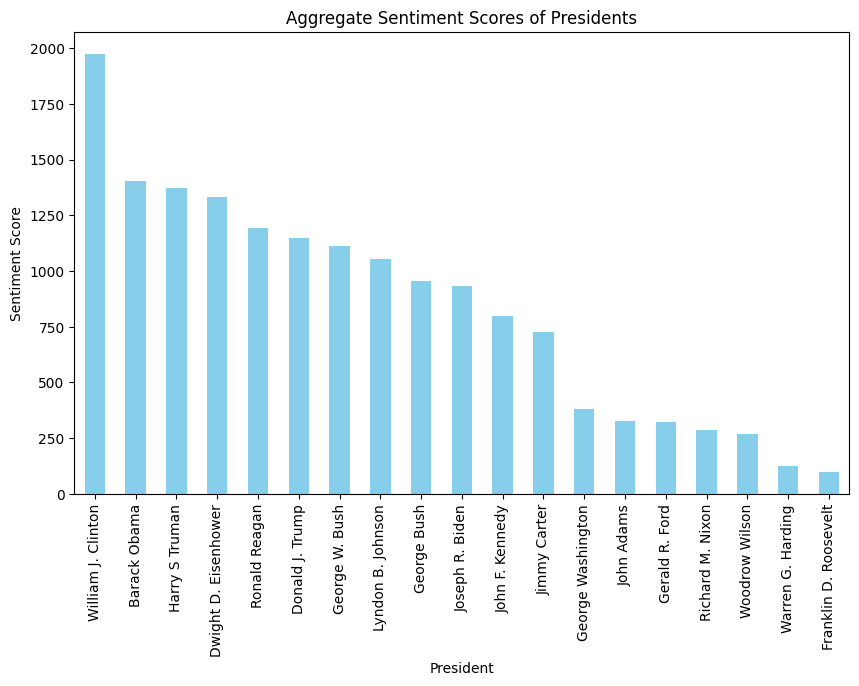

In [ ]:
from afinn import Afinn
import matplotlib.pyplot as plt


# Load the AFINN lexicon
afinn = Afinn()

# Function to calculate sentiment score for a given speech
def calculate_sentiment_score(speech):
    tokens = speech.lower().split()  # Tokenize speech into words
    sentiment_score = afinn.score(speech)  # Use AFINN for sentiment scoring
    return sentiment_score

# Calculate sentiment scores for each speech
df_speeches['Sentiment Score'] = df_speeches['Speech'].apply(calculate_sentiment_score)

# Aggregate sentiment scores for each president
aggregate_sentiment_scores = df_speeches.groupby('President')['Sentiment Score'].sum()

# Sort the presidents by their aggregated sentiment scores in descending order
aggregate_sentiment_scores_sorted = aggregate_sentiment_scores.sort_values(ascending=False)

# Visualize the aggregated sentiment scores
aggregate_sentiment_scores_sorted.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('President')
plt.ylabel('Sentiment Score')
plt.title('Aggregate Sentiment Scores of Presidents')
plt.xticks(rotation=90)
plt.show()



<ipython-input-138-517b070f1c95>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



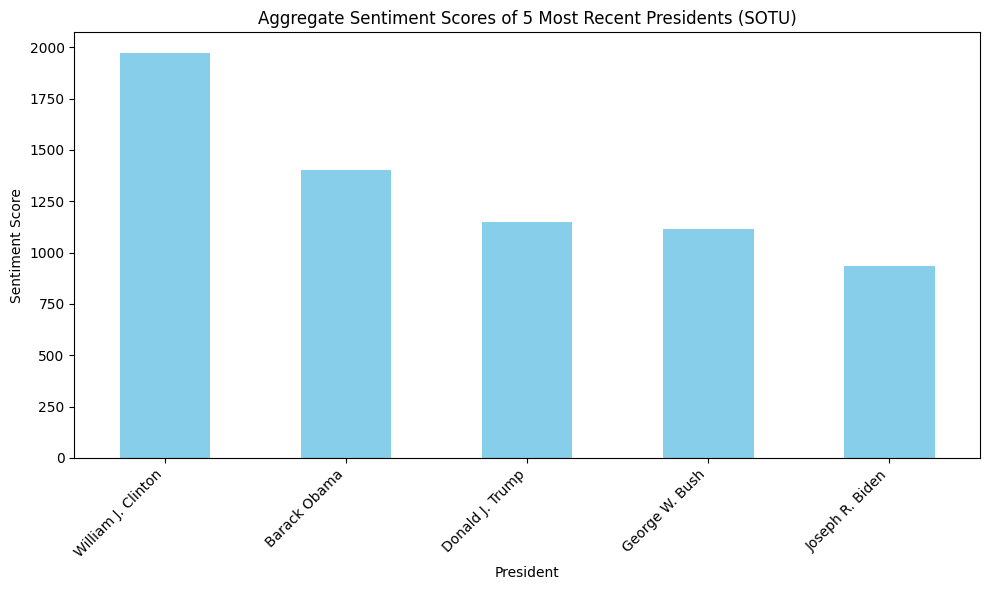

<ipython-input-138-517b070f1c95>:55: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-138-517b070f1c95>:55: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



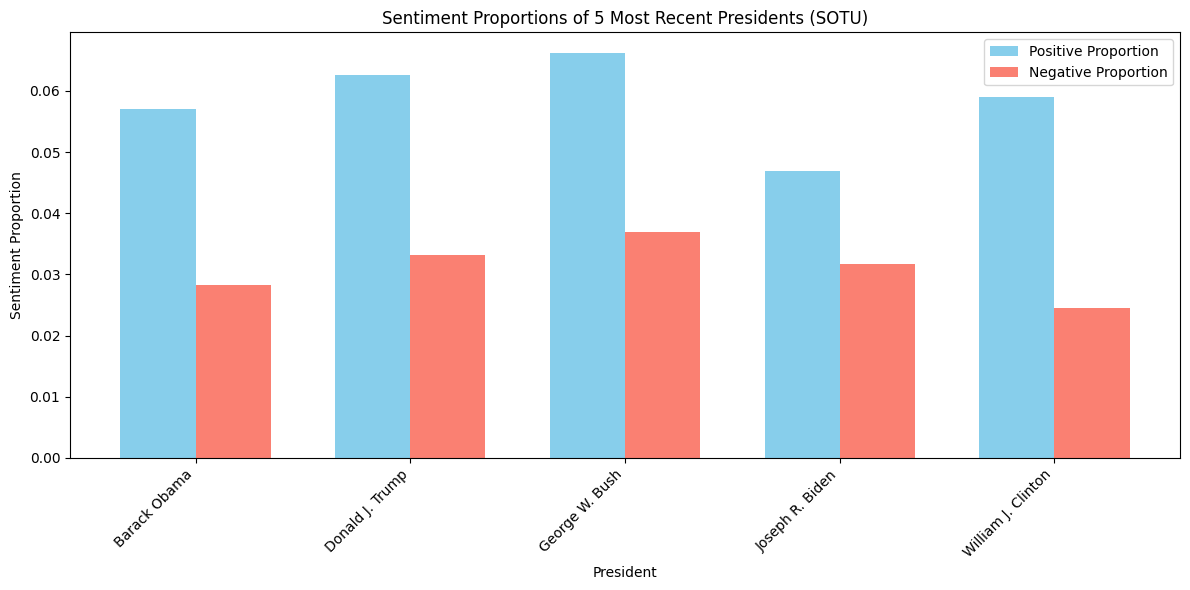

In [ ]:
from afinn import Afinn
import matplotlib.pyplot as plt
import pandas as pd

# Load the data containing state of the union addresses
# Assuming you have loaded the DataFrame df_speeches

# Filter the DataFrame to include only the 5 most recent presidents
recent_presidents = ['Joseph R. Biden', 'Donald J. Trump', 'Barack Obama', 'George W. Bush', 'William J. Clinton']
df_recent = df_speeches[df_speeches['President'].isin(recent_presidents)]

# Load the AFINN lexicon
afinn = Afinn()

# Function to calculate sentiment score for a given speech
def calculate_sentiment_score(speech):
    tokens = speech.lower().split()  # Tokenize speech into words
    sentiment_score = afinn.score(speech)  # Use AFINN for sentiment scoring
    return sentiment_score

# Calculate sentiment scores for each speech
df_recent['Sentiment Score'] = df_recent['Speech'].apply(calculate_sentiment_score)

# Aggregate sentiment scores for each president
aggregate_sentiment_scores = df_recent.groupby('President')['Sentiment Score'].sum()

# Sort the presidents by their aggregated sentiment scores in descending order
aggregate_sentiment_scores_sorted = aggregate_sentiment_scores.sort_values(ascending=False)

# Visualize the aggregated sentiment scores
aggregate_sentiment_scores_sorted.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('President')
plt.ylabel('Sentiment Score')
plt.title('Aggregate Sentiment Scores of 5 Most Recent Presidents (SOTU)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Function to calculate sentiment proportions for positive and negative words for a given speech
def calculate_sentiment_proportions(speech):
    tokens = speech.lower().split()  # Tokenize speech into words
    positive_words = [token for token in tokens if afinn.score(token) > 0]  # Filter positive words
    negative_words = [token for token in tokens if afinn.score(token) < 0]  # Filter negative words
    positive_word_count = len(positive_words)
    negative_word_count = len(negative_words)
    total_word_count = len(tokens)
    if total_word_count == 0:  # Avoid division by zero
        return 0, 0
    positive_proportion = positive_word_count / total_word_count
    negative_proportion = negative_word_count / total_word_count
    return positive_proportion, negative_proportion

# Calculate sentiment proportions for each speech
df_recent['Positive Proportion'], df_recent['Negative Proportion'] = zip(*df_recent['Speech'].apply(calculate_sentiment_proportions))

# Group the DataFrame by 'President' and aggregate the sentiment proportions
grouped_df = df_recent.groupby('President').agg({
    'Positive Proportion': 'mean',
    'Negative Proportion': 'mean'
})

# Set the positions for the bars
positions = list(range(len(grouped_df)))

# Define the width of each bar
bar_width = 0.35

# Visualize the sentiment proportions with side-by-side bars
plt.figure(figsize=(12, 6))
plt.bar(positions, grouped_df['Positive Proportion'], width=bar_width, color='skyblue', label='Positive Proportion')
plt.bar([p + bar_width for p in positions], grouped_df['Negative Proportion'], width=bar_width, color='salmon', label='Negative Proportion')
plt.xlabel('President')
plt.ylabel('Sentiment Proportion')
plt.title('Sentiment Proportions of 5 Most Recent Presidents (SOTU)')
plt.xticks([p + bar_width/2 for p in positions], grouped_df.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


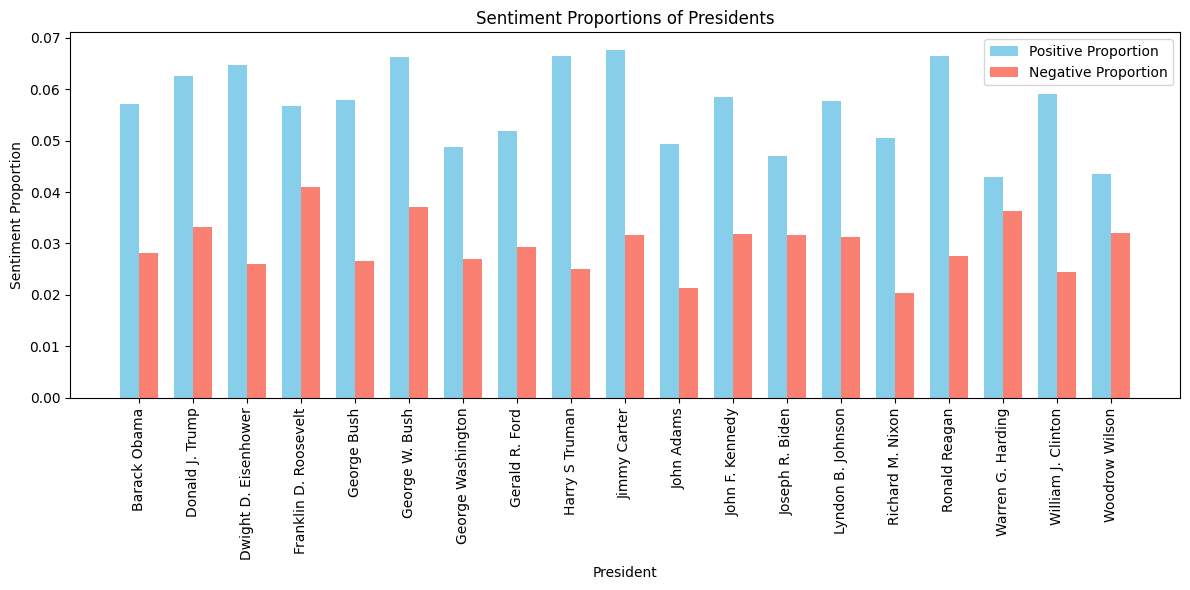

In [ ]:
import numpy as np

# Function to calculate sentiment proportions for positive and negative words for a given speech
def calculate_sentiment_proportions(speech):
    tokens = speech.lower().split()  # Tokenize speech into words
    positive_words = [token for token in tokens if afinn.score(token) > 0]  # Filter positive words
    negative_words = [token for token in tokens if afinn.score(token) < 0]  # Filter negative words
    positive_word_count = len(positive_words)
    negative_word_count = len(negative_words)
    total_word_count = len(tokens)
    if total_word_count == 0:  # Avoid division by zero
        return 0, 0
    positive_proportion = positive_word_count / total_word_count
    negative_proportion = negative_word_count / total_word_count
    return positive_proportion, negative_proportion

# Calculate sentiment proportions for each speech
df_speeches['Positive Proportion'], df_speeches['Negative Proportion'] = zip(*df_speeches['Speech'].apply(calculate_sentiment_proportions))

# Group the DataFrame by 'President' and aggregate the sentiment proportions
grouped_df = df_speeches.groupby('President').agg({
    'Positive Proportion': 'mean',
    'Negative Proportion': 'mean'
})

# Set the positions for the bars
positions = np.arange(len(grouped_df))

# Define the width of each bar
bar_width = 0.35

# Visualize the sentiment proportions with side-by-side bars
plt.figure(figsize=(12, 6))
plt.bar(positions - bar_width/2, grouped_df['Positive Proportion'], width=bar_width, color='skyblue', label='Positive Proportion')
plt.bar(positions + bar_width/2, grouped_df['Negative Proportion'], width=bar_width, color='salmon', label='Negative Proportion')
plt.xlabel('President')
plt.ylabel('Sentiment Proportion')
plt.title('Sentiment Proportions of Presidents')
plt.xticks(positions, grouped_df.index, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
sotu_proportion_df = sotu_sum_df.divide(sotu_sum_df.sum(axis="columns"), axis="rows")
sotu_proportion_df

,all,also,america,american,americans,an,and,are,as,at,...,which,who,will,with,work,world,would,year,years,you
President,,,,,,,,,,,,,,,,,,,,,
Barack Obama,0.007269,0.002601,0.010559,0.006197,0.005509,0.004055,0.072609,0.011171,0.010482,0.005815,...,0.000612,0.008110,0.012089,0.012624,0.006963,0.005585,0.001607,0.005432,0.006427,0.008569
Donald J. Trump,0.009902,0.005830,0.011290,0.012493,0.007126,0.006385,0.080788,0.018323,0.009994,0.007311,...,0.001203,0.007033,0.014714,0.012493,0.003517,0.005090,0.001851,0.005460,0.005830,0.018231
Dwight D. Eisenhower,0.011622,0.001466,0.003350,0.003560,0.000733,0.006387,0.066066,0.014553,0.012564,0.005759,...,0.008062,0.001466,0.012250,0.011517,0.001780,0.012564,0.004397,0.003979,0.003874,0.001047
Franklin D. Roosevelt,0.009292,0.000000,0.000581,0.004065,0.001161,0.006969,0.068525,0.016260,0.012195,0.004646,...,0.015099,0.005807,0.011034,0.013937,0.002904,0.004646,0.004646,0.003484,0.000000,0.002323
George Bush,0.009298,0.001232,0.010082,0.006945,0.002913,0.004369,0.084015,0.012658,0.006161,0.006721,...,0.003025,0.007057,0.016579,0.009858,0.003585,0.009522,0.002913,0.004593,0.002464,0.012210
George W. Bush,0.007153,0.004181,0.011613,0.004738,0.004366,0.005481,0.094482,0.016072,0.005574,0.005481,...,0.001951,0.005110,0.018952,0.013285,0.002973,0.006132,0.002973,0.004738,0.004088,0.008361
George Washington,0.004784,0.001196,0.000000,0.000797,0.000000,0.010564,0.060195,0.006378,0.011561,0.006777,...,0.022523,0.004186,0.014750,0.020530,0.000797,0.000399,0.003787,0.001196,0.000199,0.003787
Gerald R. Ford,0.008827,0.003484,0.006736,0.005575,0.004646,0.004878,0.069454,0.013937,0.010221,0.007201,...,0.007433,0.003949,0.021138,0.009756,0.002091,0.009756,0.003484,0.011150,0.004413,0.002787
Harry S Truman,0.009641,0.002785,0.000214,0.001178,0.000643,0.004178,0.062239,0.021425,0.014033,0.007820,...,0.009748,0.002464,0.011676,0.006535,0.003428,0.011676,0.002250,0.005035,0.003428,0.001285


In [ ]:
# lets look at Obama, Trump, Biden, GW Bush, Clinton. Maybe instead, remove pronouns and prepositions.
# use natural language processing (NLP) libraries like NLTK (Natural Language Toolkit) or SpaCy,
# which provide predefined lists of stopwords (commonly occurring words like pronouns, prepositions, conjunctions, etc.) that can be filtered out.

obama_series = sotu_proportion_df.loc["Barack Obama"].sort_values(ascending=False)
trump_series = sotu_proportion_df.loc["Donald J. Trump"].sort_values(ascending=False)
biden_series = sotu_proportion_df.loc["Joseph R. Biden"].sort_values(ascending=False)
gw_bush_series = sotu_proportion_df.loc["George W. Bush"].sort_values(ascending=False)
clinton_series = sotu_proportion_df.loc["William J. Clinton"].sort_values(ascending=False)
ghw_bush_series = sotu_proportion_df.loc["George Bush"].sort_values(ascending=False)
reagan_series = sotu_proportion_df.loc["Ronald Reagan"].sort_values(ascending=False)



In [ ]:
obama_series.index

Index(['the', 'and', 'to', 'of', 'we', 'that', 'our', 'in', 'it', 'for', 'is',
       'this', 'on', 'have', 'more', 'with', 'will', 'but', 'are', 'america',
       'as', 'can', 'they', 'not', 'or', 'their', 'new', 'you', 'who', 'us',
       'now', 'by', 'from', 'so', 'do', 'all', 'people', 'work', 'than',
       'make', 'years', 'american', 'let', 'be', 'every', 'at', 'what', 'when',
       've', 'has', 'world', 'americans', 'year', 'need', 'if', 're', 'time',
       'just', 'one', 'up', 'country', 'help', 'because', 'congress', 'an',
       'my', 'know', 'tonight', 'should', 'there', 'those', 'over', 'here',
       'no', 'them', 'states', 'these', 'first', 'security', 'was', 'most',
       'also', 'last', 'other', 'been', 'many', 'own', 'united', 'only',
       'government', 'nation', 'its', 'must', 'would', 'war', 'president',
       'great', 'nations', 'which', 'peace'],
      dtype='object')

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords



# Download NLTK stopwords and wordnet if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')


# Example Series of words
words_series = obama_series.index

# Get NLTK English stopwords list
stop_words = set(stopwords.words('english'))

# Extend stop_words list to include basic verbs and question words
additional_stop_words = {'am', 'is', 'are', 'was', 'were', 'be', 'being', 'been', 'do', 'does', 'did',
                         'have', 'has', 'had', 'can', 'could', 'will', 'would',
                         'may', 'might', 'how', 'what', 'which',
                         'who', 'whom', 'whose', 'where', 'when', 'why'}

stop_words.update(additional_stop_words)

# Drop stopwords from the Series
filtered_obama_words_series = words_series[~words_series.str.lower().isin(stop_words)]
filtered_obama_words_series



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Index(['america', 'new', 'us', 'people', 'work', 'make', 'years', 'american',
       'let', 'every', 'world', 'americans', 'year', 'need', 'time', 'one',
       'country', 'help', 'congress', 'know', 'tonight', 'states', 'first',
       'security', 'also', 'last', 'many', 'united', 'government', 'nation',
       'must', 'war', 'president', 'great', 'nations', 'peace'],
      dtype='object')

In [ ]:
# Download NLTK stopwords and wordnet if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')


# Example Series of words
words_series = trump_series.index

# Get NLTK English stopwords list
stop_words = set(stopwords.words('english'))

# Extend stop_words list to include basic verbs and question words
additional_stop_words = {'am', 'is', 'are', 'was', 'were', 'be', 'being', 'been', 'do', 'does', 'did',
                         'have', 'has', 'had', 'can', 'could', 'will', 'would',
                         'may', 'might', 'how', 'what', 'which',
                         'who', 'whom', 'whose', 'where', 'when', 'why'}

stop_words.update(additional_stop_words)

# Drop stopwords from the Series
filtered_trump_words_series = words_series[~words_series.str.lower().isin(stop_words)]
filtered_trump_words_series

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Index(['american', 'america', 'new', 'one', 'country', 'people', 'americans',
       'tonight', 'great', 'years', 'also', 'us', 'year', 'states', 'world',
       'united', 'nation', 'must', 'congress', 'time', 'last', 'many', 'first',
       'every', 'president', 'work', 'government', 'know', 'make', 'help',
       'war', 'need', 'let', 'nations', 'security', 'peace'],
      dtype='object')

In [ ]:
# Download NLTK stopwords and wordnet if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')


# Example Series of words
words_series = biden_series.index

# Get NLTK English stopwords list
stop_words = set(stopwords.words('english'))

# Extend stop_words list to include basic verbs and question words
additional_stop_words = {'am', 'is', 'are', 'was', 'were', 'be', 'being', 'been', 'do', 'does', 'did',
                         'have', 'has', 'had', 'can', 'could', 'will', 'would',
                         'may', 'might', 'how', 'what', 'which',
                         'who', 'whom', 'whose', 'where', 'when', 'why'}

stop_words.update(additional_stop_words)

# Drop stopwords from the Series
filtered_biden_words_series = words_series[~words_series.str.lower().isin(stop_words)]
filtered_biden_words_series

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Index(['america', 'american', 'people', 'president', 'know', 'let', 'world',
       'americans', 'years', 'one', 'year', 'make', 'us', 'tonight', 'every',
       'many', 'nation', 'new', 'last', 'country', 'time', 'congress', 'need',
       'also', 'united', 'states', 'first', 'help', 'work', 'war', 'security',
       'must', 'great', 'peace', 'government', 'nations'],
      dtype='object')

In [ ]:
# Download NLTK stopwords and wordnet if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')


# Example Series of words
words_series = clinton_series.index

# Get NLTK English stopwords list
stop_words = set(stopwords.words('english'))

# Extend stop_words list to include basic verbs and question words
additional_stop_words = {'am', 'is', 'are', 'was', 'were', 'be', 'being', 'been', 'do', 'does', 'did',
                         'have', 'has', 'had', 'can', 'could', 'will', 'would',
                         'may', 'might', 'how', 'what', 'which',
                         'who', 'whom', 'whose', 'where', 'when', 'why'}

stop_words.update(additional_stop_words)

# Drop stopwords from the Series
filtered_clinton_words_series = words_series[~words_series.str.lower().isin(stop_words)]
filtered_clinton_words_series

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Index(['must', 'america', 'new', 'years', 'every', 'people', 'year', 'us',
       'work', 'americans', 'make', 'help', 'world', 'first', 'tonight',
       'american', 'congress', 'one', 'last', 'let', 'know', 'also',
       'security', 'nation', 'time', 'need', 'president', 'government',
       'peace', 'country', 'many', 'nations', 'great', 'states', 'war',
       'united'],
      dtype='object')

In [ ]:
# Download NLTK stopwords and wordnet if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')


# Example Series of words
words_series = gw_bush_series.index

# Get NLTK English stopwords list
stop_words = set(stopwords.words('english'))

# Extend stop_words list to include basic verbs and question words
additional_stop_words = {'am', 'is', 'are', 'was', 'were', 'be', 'being', 'been', 'do', 'does', 'did',
                         'have', 'has', 'had', 'can', 'could', 'will', 'would',
                         'may', 'might', 'how', 'what', 'which',
                         'who', 'whom', 'whose', 'where', 'when', 'why'}

stop_words.update(additional_stop_words)

# Drop stopwords from the Series
filtered_gw_bush_words_series = words_series[~words_series.str.lower().isin(stop_words)]
filtered_gw_bush_words_series

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Index(['america', 'must', 'people', 'us', 'new', 'world', 'congress',
       'country', 'security', 'nation', 'government', 'help', 'year',
       'american', 'americans', 'make', 'also', 'years', 'every', 'tonight',
       'need', 'one', 'time', 'great', 'work', 'peace', 'many', 'states',
       'united', 'last', 'let', 'know', 'war', 'nations', 'first',
       'president'],
      dtype='object')

In [ ]:
# Download NLTK stopwords and wordnet if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')


# Example Series of words
words_series = ghw_bush_series.index

# Get NLTK English stopwords list
stop_words = set(stopwords.words('english'))

# Extend stop_words list to include basic verbs and question words
additional_stop_words = {'am', 'is', 'are', 'was', 'were', 'be', 'being', 'been', 'do', 'does', 'did',
                         'have', 'has', 'had', 'can', 'could', 'will', 'would',
                         'may', 'might', 'how', 'what', 'which',
                         'who', 'whom', 'whose', 'where', 'when', 'why'}

stop_words.update(additional_stop_words)

# Drop stopwords from the Series
filtered_ghw_bush_words_series = words_series[~words_series.str.lower().isin(stop_words)]
filtered_ghw_bush_words_series

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Index(['must', 'america', 'world', 'us', 'new', 'people', 'american', 'time',
       'let', 'know', 'one', 'tonight', 'every', 'make', 'year', 'help',
       'nation', 'congress', 'work', 'need', 'government', 'country',
       'americans', 'first', 'years', 'president', 'great', 'war', 'states',
       'united', 'peace', 'security', 'last', 'many', 'nations', 'also'],
      dtype='object')

In [ ]:
# Download NLTK stopwords and wordnet if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')


# Example Series of words
words_series = reagan_series.index

# Get NLTK English stopwords list
stop_words = set(stopwords.words('english'))

# Extend stop_words list to include basic verbs and question words
additional_stop_words = {'am', 'is', 'are', 'was', 'were', 'be', 'being', 'been', 'do', 'does', 'did',
                         'have', 'has', 'had', 'can', 'could', 'will', 'would',
                         'may', 'might', 'how', 'what', 'which',
                         'who', 'whom', 'whose', 'where', 'when', 'why'}

stop_words.update(additional_stop_words)

# Drop stopwords from the Series
filtered_reagan_words_series = words_series[~words_series.str.lower().isin(stop_words)]
filtered_reagan_words_series

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Index(['america', 'us', 'people', 'let', 'years', 'must', 'world',
       'government', 'american', 'congress', 'year', 'new', 'work', 'tonight',
       'time', 'one', 'peace', 'make', 'great', 'nation', 'know', 'states',
       'americans', 'security', 'need', 'help', 'last', 'many', 'every',
       'also', 'first', 'president', 'war', 'united', 'country', 'nations'],
      dtype='object')

In [ ]:
filtered_obama_frequencies = obama_series[obama_series.index.isin(filtered_obama_words_series)]
filtered_obama_frequencies

america       0.010559
new           0.008722
us            0.007804
people        0.007192
work          0.006963
make          0.006503
years         0.006427
american      0.006197
let           0.006121
every         0.005968
world         0.005585
americans     0.005509
year          0.005432
need          0.005203
time          0.004973
one           0.004820
country       0.004667
help          0.004438
congress      0.004208
know          0.003902
tonight       0.003902
states        0.003366
first         0.003290
security      0.002831
also          0.002601
last          0.002525
many          0.002295
united        0.002066
government    0.001913
nation        0.001913
must          0.001760
war           0.001607
president     0.001607
great         0.001224
nations       0.000918
peace         0.000459
Name: Barack Obama, dtype: float64

In [ ]:
filtered_trump_frequencies = trump_series[trump_series.index.isin(filtered_trump_words_series)]
filtered_trump_frequencies

american      0.012493
america       0.011290
new           0.007959
one           0.007681
country       0.007403
people        0.007403
americans     0.007126
tonight       0.006756
great         0.006108
years         0.005830
also          0.005830
us            0.005738
year          0.005460
states        0.005182
world         0.005090
united        0.004997
nation        0.004997
must          0.004997
congress      0.004720
time          0.004535
last          0.004349
many          0.004257
first         0.004164
every         0.004072
president     0.003609
work          0.003517
government    0.002128
know          0.002036
make          0.001851
help          0.001573
war           0.001388
need          0.001296
let           0.001203
nations       0.001203
security      0.001110
peace         0.000833
Name: Donald J. Trump, dtype: float64

In [ ]:
filtered_biden_frequencies = biden_series[biden_series.index.isin(filtered_biden_words_series)]
filtered_biden_frequencies

america       0.011169
american      0.008935
people        0.008811
president     0.008191
know          0.007198
let           0.006950
world         0.006143
americans     0.006081
years         0.005957
one           0.005522
year          0.005336
make          0.004716
us            0.004530
tonight       0.004219
every         0.004095
many          0.004033
nation        0.003909
new           0.003723
last          0.003227
country       0.003227
time          0.003040
congress      0.002916
need          0.002916
also          0.002606
united        0.002420
states        0.002358
first         0.002234
help          0.002172
work          0.001737
war           0.001613
security      0.001427
must          0.001117
great         0.001117
peace         0.000683
government    0.000558
nations       0.000434
Name: Joseph R. Biden, dtype: float64

In [ ]:
filtered_clinton_frequencies = clinton_series[clinton_series.index.isin(filtered_clinton_words_series)]
filtered_clinton_frequencies

must          0.012318
america       0.010493
new           0.010037
years         0.007952
every         0.007886
people        0.007560
year          0.007430
us            0.006387
work          0.006127
americans     0.006061
make          0.006061
help          0.005931
world         0.005475
first         0.005344
tonight       0.005279
american      0.005214
congress      0.005084
one           0.004888
last          0.004693
let           0.004236
know          0.004106
also          0.003845
security      0.003585
nation        0.003454
time          0.003324
need          0.003259
president     0.002607
government    0.002086
peace         0.002086
country       0.001890
many          0.001760
nations       0.001629
great         0.001629
states        0.001564
war           0.001238
united        0.001173
Name: William J. Clinton, dtype: float64

In [ ]:
filtered_gw_bush_frequencies = gw_bush_series[gw_bush_series.index.isin(filtered_gw_bush_words_series)]
filtered_gw_bush_frequencies

america       0.011613
must          0.008919
people        0.008268
us            0.008175
new           0.006410
world         0.006132
congress      0.006039
country       0.005481
security      0.005388
nation        0.005295
government    0.004831
help          0.004738
year          0.004738
american      0.004738
americans     0.004366
make          0.004274
also          0.004181
years         0.004088
every         0.003437
tonight       0.003344
need          0.003344
one           0.003252
time          0.003066
great         0.002973
work          0.002973
peace         0.002601
many          0.002601
states        0.002601
united        0.002508
last          0.002508
let           0.002230
know          0.001951
war           0.001858
nations       0.001672
first         0.001579
president     0.001301
Name: George W. Bush, dtype: float64

In [ ]:
filtered_ghw_bush_frequencies = ghw_bush_series[ghw_bush_series.index.isin(filtered_ghw_bush_words_series)]
filtered_ghw_bush_frequencies

must          0.011762
america       0.010082
world         0.009522
us            0.008177
new           0.007393
people        0.007057
american      0.006945
time          0.005713
let           0.005601
know          0.005601
one           0.005489
tonight       0.005377
every         0.005041
make          0.004705
year          0.004593
help          0.004593
nation        0.004369
congress      0.003697
work          0.003585
need          0.003361
government    0.003249
country       0.003137
americans     0.002913
first         0.002576
years         0.002464
president     0.002464
great         0.002352
war           0.002352
states        0.002240
united        0.002128
peace         0.002128
security      0.001904
last          0.001680
many          0.001680
nations       0.001344
also          0.001232
Name: George Bush, dtype: float64

In [ ]:
filtered_reagan_frequencies = reagan_series[reagan_series.index.isin(filtered_reagan_words_series)]
filtered_reagan_frequencies

america       0.012318
us            0.010576
people        0.008336
let           0.008212
years         0.007465
must          0.007341
world         0.006968
government    0.006968
american      0.006470
congress      0.005972
year          0.005475
new           0.005226
work          0.005101
tonight       0.004977
time          0.004728
one           0.004230
peace         0.003733
make          0.003484
great         0.003484
nation        0.003484
know          0.003359
states        0.002862
americans     0.002737
security      0.002613
need          0.002488
help          0.002488
last          0.002488
many          0.002364
every         0.002115
also          0.001991
first         0.001866
president     0.001742
war           0.001742
united        0.001742
country       0.001618
nations       0.001493
Name: Ronald Reagan, dtype: float64

In [ ]:
new_df = pd.concat([filtered_obama_frequencies, filtered_trump_frequencies, filtered_biden_frequencies, filtered_gw_bush_frequencies, filtered_ghw_bush_frequencies, filtered_clinton_frequencies, filtered_reagan_frequencies], axis=1, keys=['Obama', 'Trump', 'Biden', 'GW Bush', 'GHW Bush', "Clinton", "Reagan"])
new_df

,Obama,Trump,Biden,GW Bush,GHW Bush,Clinton,Reagan
america,0.010559,0.011290,0.011169,0.011613,0.010082,0.010493,0.012318
new,0.008722,0.007959,0.003723,0.006410,0.007393,0.010037,0.005226
us,0.007804,0.005738,0.004530,0.008175,0.008177,0.006387,0.010576
people,0.007192,0.007403,0.008811,0.008268,0.007057,0.007560,0.008336
work,0.006963,0.003517,0.001737,0.002973,0.003585,0.006127,0.005101
make,0.006503,0.001851,0.004716,0.004274,0.004705,0.006061,0.003484
years,0.006427,0.005830,0.005957,0.004088,0.002464,0.007952,0.007465
american,0.006197,0.012493,0.008935,0.004738,0.006945,0.005214,0.006470
let,0.006121,0.001203,0.006950,0.002230,0.005601,0.004236,0.008212
every,0.005968,0.004072,0.004095,0.003437,0.005041,0.007886,0.002115


In [ ]:
new_df.loc["america"]

Obama       0.010559
Trump       0.011290
Biden       0.011169
GW Bush     0.011613
GHW Bush    0.010082
Clinton     0.010493
Reagan      0.012318
Name: america, dtype: float64

In [ ]:
new_df.loc['america(ns)'] = new_df.loc[['america', 'american', 'americans']].sum(axis=0)
new_df

,Obama,Trump,Biden,GW Bush,GHW Bush,Clinton,Reagan
america,0.010559,0.011290,0.011169,0.011613,0.010082,0.010493,0.012318
new,0.008722,0.007959,0.003723,0.006410,0.007393,0.010037,0.005226
us,0.007804,0.005738,0.004530,0.008175,0.008177,0.006387,0.010576
people,0.007192,0.007403,0.008811,0.008268,0.007057,0.007560,0.008336
work,0.006963,0.003517,0.001737,0.002973,0.003585,0.006127,0.005101
make,0.006503,0.001851,0.004716,0.004274,0.004705,0.006061,0.003484
years,0.006427,0.005830,0.005957,0.004088,0.002464,0.007952,0.007465
american,0.006197,0.012493,0.008935,0.004738,0.006945,0.005214,0.006470
let,0.006121,0.001203,0.006950,0.002230,0.005601,0.004236,0.008212
every,0.005968,0.004072,0.004095,0.003437,0.005041,0.007886,0.002115


In [ ]:
new_df_cleaned = new_df.drop(["america", 'american', 'americans'])

In [ ]:
new_df_cleaned

,Obama,Trump,Biden,GW Bush,GHW Bush,Clinton,Reagan
new,0.008722,0.007959,0.003723,0.006410,0.007393,0.010037,0.005226
us,0.007804,0.005738,0.004530,0.008175,0.008177,0.006387,0.010576
people,0.007192,0.007403,0.008811,0.008268,0.007057,0.007560,0.008336
work,0.006963,0.003517,0.001737,0.002973,0.003585,0.006127,0.005101
make,0.006503,0.001851,0.004716,0.004274,0.004705,0.006061,0.003484
years,0.006427,0.005830,0.005957,0.004088,0.002464,0.007952,0.007465
let,0.006121,0.001203,0.006950,0.002230,0.005601,0.004236,0.008212
every,0.005968,0.004072,0.004095,0.003437,0.005041,0.007886,0.002115
world,0.005585,0.005090,0.006143,0.006132,0.009522,0.005475,0.006968
year,0.005432,0.005460,0.005336,0.004738,0.004593,0.007430,0.005475


In [ ]:
new_df_cleaned_transposed = new_df_cleaned.transpose()


# Define a function to select top n words for each president
def top_n_words(series, n=5):
    return series.sort_values(ascending=False).head(n)

# Apply the function to each president's row
top5_new_df_cleaned_transposed = new_df_cleaned_transposed.apply(top_n_words, axis=1)

# Transpose the DataFrame back
top5_new_df_cleaned_dont_use = top5_new_df_cleaned_transposed.transpose()

top5_new_df_cleaned_dont_use

,Obama,Trump,Biden,GW Bush,GHW Bush,Clinton,Reagan
america(ns),0.022265,0.030909,0.026185,0.020717,0.019940,0.021769,0.021525
country,NaN,0.007403,NaN,NaN,NaN,NaN,NaN
every,NaN,NaN,NaN,NaN,NaN,0.007886,NaN
know,NaN,NaN,0.007198,NaN,NaN,NaN,NaN
let,NaN,NaN,0.006950,NaN,NaN,NaN,0.008212
must,NaN,NaN,NaN,0.008919,0.011762,0.012318,NaN
new,0.008722,0.007959,NaN,0.006410,0.007393,0.010037,NaN
one,NaN,0.007681,NaN,NaN,NaN,NaN,NaN
people,0.007192,0.007403,0.008811,0.008268,NaN,NaN,0.008336
president,NaN,NaN,0.008191,NaN,NaN,NaN,NaN


In [ ]:
top5_new_df_cleaned_dont_use.index

Index(['america(ns)', 'country', 'every', 'know', 'let', 'must', 'new', 'one',
       'people', 'president', 'us', 'work', 'world', 'years'],
      dtype='object')

In [ ]:
indices_to_include = top5_new_df_cleaned_dont_use.index

# Filter the DataFrame to include only the specified indices
top5_new_df_cleaned = new_df_cleaned.loc[indices_to_include]

top5_new_df_cleaned

,Obama,Trump,Biden,GW Bush,GHW Bush,Clinton,Reagan
america(ns),0.022265,0.030909,0.026185,0.020717,0.019940,0.021769,0.021525
country,0.004667,0.007403,0.003227,0.005481,0.003137,0.001890,0.001618
every,0.005968,0.004072,0.004095,0.003437,0.005041,0.007886,0.002115
know,0.003902,0.002036,0.007198,0.001951,0.005601,0.004106,0.003359
let,0.006121,0.001203,0.006950,0.002230,0.005601,0.004236,0.008212
must,0.001760,0.004997,0.001117,0.008919,0.011762,0.012318,0.007341
new,0.008722,0.007959,0.003723,0.006410,0.007393,0.010037,0.005226
one,0.004820,0.007681,0.005522,0.003252,0.005489,0.004888,0.004230
people,0.007192,0.007403,0.008811,0.008268,0.007057,0.007560,0.008336
president,0.001607,0.003609,0.008191,0.001301,0.002464,0.002607,0.001742


In [ ]:
#for graphing
top5_new_df_cleaned_forgraphing = top5_new_df_cleaned.drop(columns=["Reagan", "GHW Bush"])
top5_new_df_cleaned_forgraphing

,Obama,Trump,Biden,GW Bush,Clinton
america(ns),0.022265,0.030909,0.026185,0.020717,0.021769
country,0.004667,0.007403,0.003227,0.005481,0.001890
every,0.005968,0.004072,0.004095,0.003437,0.007886
know,0.003902,0.002036,0.007198,0.001951,0.004106
let,0.006121,0.001203,0.006950,0.002230,0.004236
must,0.001760,0.004997,0.001117,0.008919,0.012318
new,0.008722,0.007959,0.003723,0.006410,0.010037
one,0.004820,0.007681,0.005522,0.003252,0.004888
people,0.007192,0.007403,0.008811,0.008268,0.007560
president,0.001607,0.003609,0.008191,0.001301,0.002607


In [ ]:
import plotly.express as px

fig = px.bar(top5_new_df_cleaned_forgraphing, barmode="group", title="Most Common Meaningful Words in SOTU Speeches And Usage By Presidents (In Proportion)")
# Update layout
fig.update_layout(
    xaxis_title="Most Common Meaningful Words (Top 5 For Each President)",
    yaxis_title="Usage By Presidents (Percentage of Corpus)"

)

# Update legend label
fig.update_layout(
    legend_title="Presidents"
)


# Show plot
fig.show()

In [ ]:
#transpose matrix for pairwise distance

new_df_cleaned_transpose = new_df_cleaned.transpose()

new_df_cleaned_transpose.reset_index(inplace=True)
new_df_cleaned_transpose.rename(columns={'index': 'President'}, inplace=True)
new_df_cleaned_transpose

,President,new,us,people,work,make,years,let,every,world,...,united,government,nation,must,war,president,great,nations,peace,america(ns)
0,Obama,0.008722,0.007804,0.007192,0.006963,0.006503,0.006427,0.006121,0.005968,0.005585,...,0.002066,0.001913,0.001913,0.001760,0.001607,0.001607,0.001224,0.000918,0.000459,0.022265
1,Trump,0.007959,0.005738,0.007403,0.003517,0.001851,0.005830,0.001203,0.004072,0.005090,...,0.004997,0.002128,0.004997,0.004997,0.001388,0.003609,0.006108,0.001203,0.000833,0.030909
2,Biden,0.003723,0.004530,0.008811,0.001737,0.004716,0.005957,0.006950,0.004095,0.006143,...,0.002420,0.000558,0.003909,0.001117,0.001613,0.008191,0.001117,0.000434,0.000683,0.026185
3,GW Bush,0.006410,0.008175,0.008268,0.002973,0.004274,0.004088,0.002230,0.003437,0.006132,...,0.002508,0.004831,0.005295,0.008919,0.001858,0.001301,0.002973,0.001672,0.002601,0.020717
4,GHW Bush,0.007393,0.008177,0.007057,0.003585,0.004705,0.002464,0.005601,0.005041,0.009522,...,0.002128,0.003249,0.004369,0.011762,0.002352,0.002464,0.002352,0.001344,0.002128,0.019940
5,Clinton,0.010037,0.006387,0.007560,0.006127,0.006061,0.007952,0.004236,0.007886,0.005475,...,0.001173,0.002086,0.003454,0.012318,0.001238,0.002607,0.001629,0.001629,0.002086,0.021769
6,Reagan,0.005226,0.010576,0.008336,0.005101,0.003484,0.007465,0.008212,0.002115,0.006968,...,0.001742,0.006968,0.003484,0.007341,0.001742,0.001742,0.003484,0.001493,0.003733,0.021525


In [ ]:
new_df_cleaned_transpose = new_df_cleaned_transpose.drop(columns=["President"])

In [ ]:
#run pairwise distance to see which president is similar to which president.
# other ideas: clusters. So we have clusters, pairwise distance, sentiment analysis, and proportion.

from sklearn.metrics import pairwise_distances
pairwise_distances_matrix = pairwise_distances(new_df_cleaned_transpose, new_df_cleaned_transpose, metric="cosine")
pairwise_distances_matrix

array([[0.00000000e+00, 8.10262408e-02, 7.09945326e-02, 7.29412050e-02,
        7.87800207e-02, 6.30006603e-02, 6.61561468e-02],
       [8.10262408e-02, 2.22044605e-16, 7.45012865e-02, 7.39982204e-02,
        1.11370381e-01, 1.05562348e-01, 1.03038061e-01],
       [7.09945326e-02, 7.45012865e-02, 0.00000000e+00, 1.21245554e-01,
        1.16046337e-01, 1.24764527e-01, 1.02913289e-01],
       [7.29412050e-02, 7.39982204e-02, 1.21245554e-01, 3.33066907e-16,
        4.76595905e-02, 5.53997162e-02, 4.90125841e-02],
       [7.87800207e-02, 1.11370381e-01, 1.16046337e-01, 4.76595905e-02,
        0.00000000e+00, 4.76823848e-02, 5.32538448e-02],
       [6.30006603e-02, 1.05562348e-01, 1.24764527e-01, 5.53997162e-02,
        4.76823848e-02, 1.11022302e-16, 7.41546279e-02],
       [6.61561468e-02, 1.03038061e-01, 1.02913289e-01, 4.90125841e-02,
        5.32538448e-02, 7.41546279e-02, 0.00000000e+00]])

In [ ]:
pairwise_distances_df = pd.DataFrame(pairwise_distances_matrix, index=new_df_cleaned_transpose .index, columns=new_df_cleaned_transpose.index)
pairwise_distances_df

,0,1,2,3,4,5,6
0,0.000000,8.102624e-02,0.070995,7.294120e-02,0.078780,6.300066e-02,0.066156
1,0.081026,2.220446e-16,0.074501,7.399822e-02,0.111370,1.055623e-01,0.103038
2,0.070995,7.450129e-02,0.000000,1.212456e-01,0.116046,1.247645e-01,0.102913
3,0.072941,7.399822e-02,0.121246,3.330669e-16,0.047660,5.539972e-02,0.049013
4,0.078780,1.113704e-01,0.116046,4.765959e-02,0.000000,4.768238e-02,0.053254
5,0.063001,1.055623e-01,0.124765,5.539972e-02,0.047682,1.110223e-16,0.074155
6,0.066156,1.030381e-01,0.102913,4.901258e-02,0.053254,7.415463e-02,0.000000


In [ ]:
pairwise_distances_df = pairwise_distances_df.rename(columns={0: 'Obama', 1: 'Trump', 2: 'Biden', 3: 'GW Bush', 4: 'GHW Bush', 5: 'Clinton', 6: 'Reagan'})
pairwise_distances_df = pairwise_distances_df.rename(index={0: 'Obama', 1: 'Trump', 2: 'Biden', 3: 'GW Bush', 4: 'GHW Bush', 5: 'Clinton', 6: 'Reagan'})
pairwise_distances_df

,Obama,Trump,Biden,GW Bush,GHW Bush,Clinton,Reagan
Obama,0.000000,8.102624e-02,0.070995,7.294120e-02,0.078780,6.300066e-02,0.066156
Trump,0.081026,2.220446e-16,0.074501,7.399822e-02,0.111370,1.055623e-01,0.103038
Biden,0.070995,7.450129e-02,0.000000,1.212456e-01,0.116046,1.247645e-01,0.102913
GW Bush,0.072941,7.399822e-02,0.121246,3.330669e-16,0.047660,5.539972e-02,0.049013
GHW Bush,0.078780,1.113704e-01,0.116046,4.765959e-02,0.000000,4.768238e-02,0.053254
Clinton,0.063001,1.055623e-01,0.124765,5.539972e-02,0.047682,1.110223e-16,0.074155
Reagan,0.066156,1.030381e-01,0.102913,4.901258e-02,0.053254,7.415463e-02,0.000000


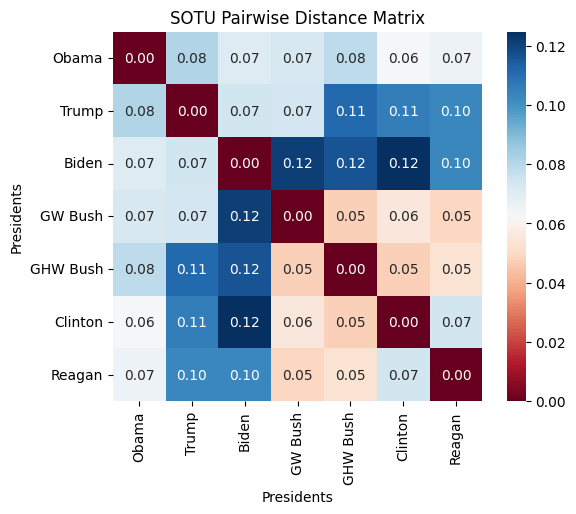

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(pairwise_distances_df, cmap='RdBu', annot=True, fmt=".2f", square=True)

# Add labels and title
plt.xlabel('Presidents')
plt.ylabel('Presidents')
plt.title('SOTU Pairwise Distance Matrix')

# Show plot
plt.show()

Obama most similar with Clinton. Trump most similar with GW Bush. Biden most similar with Obama. GW Bush most similar with GHW Bush. GHW Bush most similar with GW Bush. Clinton most similar with GHW Bush. Reagan most similar with GW Bush. -> Republicans similar to Republicans. Democrats Similar to Democrats. Not Surprising.


In [ ]:
# maybe run clustering on all of them?

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_inaugural_addresses():
    url = "https://www.presidency.ucsb.edu/documents/presidential-documents-archive-guidebook/inaugural-addresses"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        table = soup.find("table", class_="table")
        if table:
            addresses_data = []
            rows = table.find_all("tr")[1:]  # Exclude header row
            for row in rows:
                cells = row.find_all("td")
                if len(cells) >= 3:  # Ensure that there are at least 3 cells
                    president = cells[0].strong.get_text(strip=True) if cells[0].strong else ""
                    date = cells[1].a.get_text(strip=True) if cells[1].a else ""
                    address_url = cells[1].a["href"] if cells[1].a else ""
                    word_count = cells[2].get_text(strip=True)
                    address_content = ""
                    if address_url:
                        address_content = scrape_address_content(address_url)
                    addresses_data.append({
                        "President": president,
                        "Date": date,
                        "Address Content": address_content,
                        "Word Count": word_count
                    })
            return addresses_data
        else:
            print("Table not found.")
    else:
        print("Failed to fetch page:", response.status_code)

def scrape_address_content(address_url):
    response = requests.get(address_url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        content_div = soup.find("div", class_="field-docs-content")
        if content_div:
            return content_div.get_text(strip=True)
        else:
            print("Address content not found.")
    else:
        print("Failed to fetch address page:", response.status_code)
    return ""

# Scrape inaugural addresses and create DataFrame
addresses_data = scrape_inaugural_addresses()
df_addresses = pd.DataFrame(addresses_data)
df_addresses


,President,Date,Address Content,Word Count
0,George Washington,"April 30, 1789",Fellow-Citizens of the Senate and of the House...,1431
1,,"March 4, 1793",Fellow Citizens:I AM again called upon by the ...,135
2,John Adams,"March 4, 1797","WHEN it was first perceived, in early times, t...",2321
3,Thomas Jefferson,"March 4, 1801",Friends and Fellow-Citizens:CALLED upon to und...,1730
4,,"March 4, 1805","PROCEEDING, fellow-citizens, to that qualifica...",2166
5,James Madison,"March 4, 1809",Unwilling to depart from examples of the most ...,1177
6,,"March 4, 1813",About to add the solemnity of an oath to the o...,1211
7,James Monroe,"March 4, 1817",I should be destitute of feeling if I was not ...,3375
8,,"March 4, 1821",Fellow-Citizens:I shall not attempt to describ...,4472
9,John Quincy Adams,"March 4, 1825",In compliance with an usage coeval with the ex...,2915


In [ ]:

def fill_empty_authors(df):
    prev_author = ""  # Variable to store the previous author name
    for index, row in df.iterrows():
        if not row['President']:  # Check if author name is empty
            df.at[index, 'President'] = prev_author  # Fill with previous non-empty author name
        else:
            prev_author = row['President']  # Update previous author name
    return df

df_inaugural_addresses = fill_empty_authors(df_addresses)
df_inaugural_addresses


,President,Date,Address Content,Word Count
0,George Washington,"April 30, 1789",Fellow-Citizens of the Senate and of the House...,1431
1,George Washington,"March 4, 1793",Fellow Citizens:I AM again called upon by the ...,135
2,John Adams,"March 4, 1797","WHEN it was first perceived, in early times, t...",2321
3,Thomas Jefferson,"March 4, 1801",Friends and Fellow-Citizens:CALLED upon to und...,1730
4,Thomas Jefferson,"March 4, 1805","PROCEEDING, fellow-citizens, to that qualifica...",2166
5,James Madison,"March 4, 1809",Unwilling to depart from examples of the most ...,1177
6,James Madison,"March 4, 1813",About to add the solemnity of an oath to the o...,1211
7,James Monroe,"March 4, 1817",I should be destitute of feeling if I was not ...,3375
8,James Monroe,"March 4, 1821",Fellow-Citizens:I shall not attempt to describ...,4472
9,John Quincy Adams,"March 4, 1825",In compliance with an usage coeval with the ex...,2915


<ipython-input-175-ac49f56a31c3>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



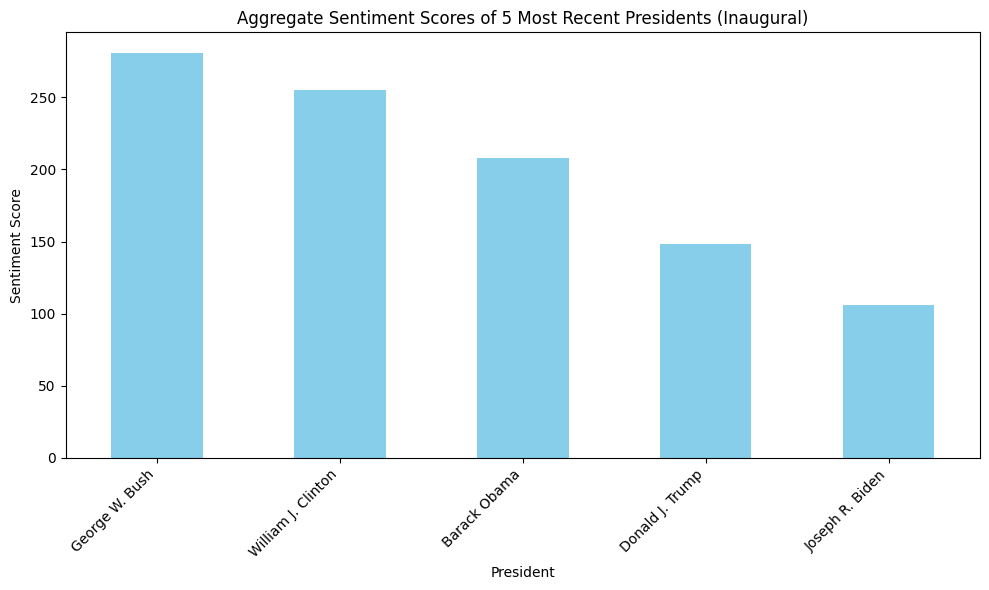

<ipython-input-175-ac49f56a31c3>:55: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-175-ac49f56a31c3>:55: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



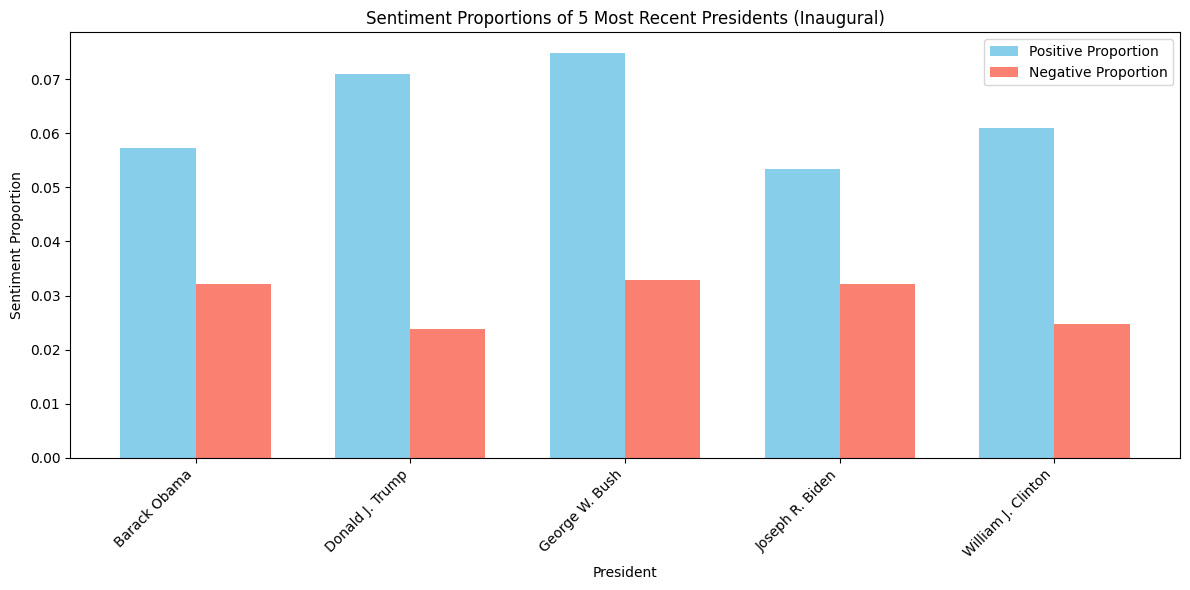

In [ ]:
from afinn import Afinn
import matplotlib.pyplot as plt
import pandas as pd

# Load the data containing state of the union addresses
# Assuming you have loaded the DataFrame df_speeches

# Filter the DataFrame to include only the 5 most recent presidents
recent_presidents = ['Joseph R. Biden', 'Donald J. Trump', 'Barack Obama', 'George W. Bush', 'William J. Clinton']
df_recent = df_inaugural_addresses[df_inaugural_addresses['President'].isin(recent_presidents)]

# Load the AFINN lexicon
afinn = Afinn()

# Function to calculate sentiment score for a given speech
def calculate_sentiment_score(speech):
    tokens = speech.lower().split()  # Tokenize speech into words
    sentiment_score = afinn.score(speech)  # Use AFINN for sentiment scoring
    return sentiment_score

# Calculate sentiment scores for each speech
df_recent['Sentiment Score'] = df_recent['Address Content'].apply(calculate_sentiment_score)

# Aggregate sentiment scores for each president
aggregate_sentiment_scores = df_recent.groupby('President')['Sentiment Score'].sum()

# Sort the presidents by their aggregated sentiment scores in descending order
aggregate_sentiment_scores_sorted = aggregate_sentiment_scores.sort_values(ascending=False)

# Visualize the aggregated sentiment scores
aggregate_sentiment_scores_sorted.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('President')
plt.ylabel('Sentiment Score')
plt.title('Aggregate Sentiment Scores of 5 Most Recent Presidents (Inaugural)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Function to calculate sentiment proportions for positive and negative words for a given speech
def calculate_sentiment_proportions(speech):
    tokens = speech.lower().split()  # Tokenize speech into words
    positive_words = [token for token in tokens if afinn.score(token) > 0]  # Filter positive words
    negative_words = [token for token in tokens if afinn.score(token) < 0]  # Filter negative words
    positive_word_count = len(positive_words)
    negative_word_count = len(negative_words)
    total_word_count = len(tokens)
    if total_word_count == 0:  # Avoid division by zero
        return 0, 0
    positive_proportion = positive_word_count / total_word_count
    negative_proportion = negative_word_count / total_word_count
    return positive_proportion, negative_proportion

# Calculate sentiment proportions for each speech
df_recent['Positive Proportion'], df_recent['Negative Proportion'] = zip(*df_recent['Address Content'].apply(calculate_sentiment_proportions))

# Group the DataFrame by 'President' and aggregate the sentiment proportions
grouped_df = df_recent.groupby('President').agg({
    'Positive Proportion': 'mean',
    'Negative Proportion': 'mean'
})

# Set the positions for the bars
positions = list(range(len(grouped_df)))

# Define the width of each bar
bar_width = 0.35

# Visualize the sentiment proportions with side-by-side bars
plt.figure(figsize=(12, 6))
plt.bar(positions, grouped_df['Positive Proportion'], width=bar_width, color='skyblue', label='Positive Proportion')
plt.bar([p + bar_width for p in positions], grouped_df['Negative Proportion'], width=bar_width, color='salmon', label='Negative Proportion')
plt.xlabel('President')
plt.ylabel('Sentiment Proportion')
plt.title('Sentiment Proportions of 5 Most Recent Presidents (Inaugural)')
plt.xticks([p + bar_width/2 for p in positions], grouped_df.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Create a DataFrame to display sentiment proportions
sentiment_proportions_df = grouped_df[['Positive Proportion', 'Negative Proportion']].reset_index()
sentiment_proportions_df.columns.name = None  # Remove column name for better display

print(sentiment_proportions_df)


            President  Positive Proportion  Negative Proportion
0        Barack Obama             0.057254             0.032087
1     Donald J. Trump             0.070927             0.023876
2      George W. Bush             0.074896             0.032900
3     Joseph R. Biden             0.053371             0.032103
4  William J. Clinton             0.061047             0.024705


In [ ]:
df_inaugural_addresses_names = df_inaugural_addresses.iloc[:, :2]
df_inaugural_addresses_names

,President,Date
0,George Washington,"April 30, 1789"
1,George Washington,"March 4, 1793"
2,John Adams,"March 4, 1797"
3,Thomas Jefferson,"March 4, 1801"
4,Thomas Jefferson,"March 4, 1805"
5,James Madison,"March 4, 1809"
6,James Madison,"March 4, 1813"
7,James Monroe,"March 4, 1817"
8,James Monroe,"March 4, 1821"
9,John Quincy Adams,"March 4, 1825"


In [ ]:
df_inaugural_addresses["Address Content"][0]

'Fellow-Citizens of the Senate and of the House of Representatives:Among the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order, and received on the 14th day of the present month. On the one hand, I was summoned by my country, whose voice I can never hear but with veneration and love, from a retreat which I had chosen with the fondest predilection, and, in my flattering hopes, with an immutable decision, as the asylum of my declining years—a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination, and of frequent interruptions in my health to the gradual waste committed on it by time. On the other hand, the magnitude and difficulty of the trust to which the voice of my country called me, being sufficient to awaken in the wisest and most experienced of her citizens a distrustful scrutiny into his qualifications, could not but ov

In [ ]:
inaugural_addresses_list = df_inaugural_addresses["Address Content"].apply(str).tolist()
inaugural_addresses_list

['Fellow-Citizens of the Senate and of the House of Representatives:Among the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order, and received on the 14th day of the present month. On the one hand, I was summoned by my country, whose voice I can never hear but with veneration and love, from a retreat which I had chosen with the fondest predilection, and, in my flattering hopes, with an immutable decision, as the asylum of my declining years—a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination, and of frequent interruptions in my health to the gradual waste committed on it by time. On the other hand, the magnitude and difficulty of the trust to which the voice of my country called me, being sufficient to awaken in the wisest and most experienced of her citizens a distrustful scrutiny into his qualifications, could not but o

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vec = CountVectorizer(max_features=100)
vec.fit(inaugural_addresses_list)
tf_matrix = vec.transform(modified_list)
tf_matrix = tf_matrix.todense()


In [ ]:
feature_names = vec.get_feature_names_out()
inaug_tf_df = pd.DataFrame(tf_matrix, index=range(0, tf_matrix.shape[0]), columns=feature_names)
inaug_tf_df

,all,america,american,an,and,any,are,as,at,be,...,what,when,which,who,will,with,world,would,years,you
0,36,56,53,23,269,9,43,45,23,37,...,26,23,4,28,46,42,29,9,22,69
1,29,43,26,16,316,4,34,35,32,38,...,23,14,3,25,37,57,26,10,14,86
2,54,37,31,20,275,10,51,45,44,36,...,19,21,4,29,16,43,25,8,32,112
3,40,44,34,15,280,9,44,23,36,28,...,26,24,3,20,34,42,19,12,28,94
4,34,29,33,18,212,2,37,25,19,28,...,7,9,2,18,57,34,17,3,7,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2,0,0,5,50,1,3,10,6,20,...,0,0,22,0,15,22,1,1,0,7
58,3,0,0,16,49,3,3,10,7,43,...,2,3,22,3,21,24,1,4,1,6
59,10,0,2,18,86,6,8,19,9,36,...,5,6,34,11,14,17,1,10,0,3
60,7,0,1,6,73,2,8,10,6,22,...,1,4,31,3,18,39,0,0,0,7


In [ ]:
inaug_merged_df = pd.merge(df_inaugural_addresses_names, inaug_tf_df, left_index=True, right_index=True, how='inner')
inaug_merged_df

,President,Date,all,america,american,an,and,any,are,as,...,what,when,which,who,will,with,world,would,years,you
0,George Washington,"April 30, 1789",36,56,53,23,269,9,43,45,...,26,23,4,28,46,42,29,9,22,69
1,George Washington,"March 4, 1793",29,43,26,16,316,4,34,35,...,23,14,3,25,37,57,26,10,14,86
2,John Adams,"March 4, 1797",54,37,31,20,275,10,51,45,...,19,21,4,29,16,43,25,8,32,112
3,Thomas Jefferson,"March 4, 1801",40,44,34,15,280,9,44,23,...,26,24,3,20,34,42,19,12,28,94
4,Thomas Jefferson,"March 4, 1805",34,29,33,18,212,2,37,25,...,7,9,2,18,57,34,17,3,7,24
5,James Madison,"March 4, 1809",29,30,32,18,245,8,55,30,...,16,7,3,30,38,30,11,2,11,54
6,James Madison,"March 4, 1813",15,25,34,16,195,3,42,26,...,3,9,4,14,30,31,10,7,27,46
7,James Monroe,"March 4, 1817",29,38,36,17,221,2,64,27,...,8,6,4,14,34,40,17,8,18,73
8,James Monroe,"March 4, 1821",27,28,19,13,255,3,39,27,...,19,15,2,19,55,44,11,12,22,18
9,John Quincy Adams,"March 4, 1825",26,39,21,24,253,6,27,31,...,20,18,1,20,42,54,16,1,19,26


In [ ]:
# Combine all the same presidents, drop year column
summary_inaug_merged_df = inaug_merged_df.drop(columns=['Date'])
inaug_sum_df = summary_inaug_merged_df.groupby("President").sum()
inaug_sum_df

,all,america,american,an,and,any,are,as,at,be,...,what,when,which,who,will,with,world,would,years,you
President,,,,,,,,,,,,,,,,,,,,,
Abraham Lincoln,110,69,44,22,544,11,72,63,55,71,...,36,32,21,46,106,111,33,19,64,162
Andrew Jackson,42,71,41,16,441,10,80,79,44,33,...,36,41,5,67,61,67,46,8,43,68
Barack Obama,7,1,3,12,144,9,11,17,14,48,...,3,8,45,1,31,36,4,4,1,10
Benjamin Harrison,15,31,12,13,136,2,10,16,8,24,...,8,5,1,2,25,22,11,4,6,24
Calvin Coolidge,16,13,17,12,187,7,31,14,6,28,...,5,4,12,6,61,29,16,6,12,11
Donald J. Trump,2,0,0,5,50,1,3,10,6,20,...,0,0,22,0,15,22,1,1,0,7
Dwight D. Eisenhower,60,10,16,28,301,16,60,63,26,79,...,9,6,35,7,51,48,56,16,10,5
Franklin D. Roosevelt,130,41,45,62,959,37,156,124,74,159,...,15,30,56,51,197,141,64,28,51,49
Franklin Pierce,54,48,16,22,233,5,27,33,20,43,...,17,6,6,14,54,44,31,3,32,29


In [ ]:
inaug_proportion_df = inaug_sum_df.divide(inaug_sum_df.sum(axis="columns"), axis="rows")
inaug_proportion_df

,all,america,american,an,and,any,are,as,at,be,...,what,when,which,who,will,with,world,would,years,you
President,,,,,,,,,,,,,,,,,,,,,
Abraham Lincoln,0.014385,0.009023,0.005754,0.002877,0.071139,0.001438,0.009415,0.008239,0.007192,0.009285,...,0.004708,0.004185,0.002746,0.006015,0.013862,0.014515,0.004315,0.002485,0.008369,0.021185
Andrew Jackson,0.007015,0.011859,0.006848,0.002672,0.073660,0.001670,0.013362,0.013195,0.007349,0.005512,...,0.006013,0.006848,0.000835,0.011191,0.010189,0.011191,0.007683,0.001336,0.007182,0.011358
Barack Obama,0.003495,0.000499,0.001498,0.005991,0.071892,0.004493,0.005492,0.008487,0.006990,0.023964,...,0.001498,0.003994,0.022466,0.000499,0.015477,0.017973,0.001997,0.001997,0.000499,0.004993
Benjamin Harrison,0.009085,0.018776,0.007268,0.007874,0.082374,0.001211,0.006057,0.009691,0.004846,0.014537,...,0.004846,0.003028,0.000606,0.001211,0.015142,0.013325,0.006663,0.002423,0.003634,0.014537
Calvin Coolidge,0.007008,0.005694,0.007446,0.005256,0.081910,0.003066,0.013579,0.006132,0.002628,0.012265,...,0.002190,0.001752,0.005256,0.002628,0.026719,0.012703,0.007008,0.002628,0.005256,0.004818
Donald J. Trump,0.002667,0.000000,0.000000,0.006667,0.066667,0.001333,0.004000,0.013333,0.008000,0.026667,...,0.000000,0.000000,0.029333,0.000000,0.020000,0.029333,0.001333,0.001333,0.000000,0.009333
Dwight D. Eisenhower,0.013624,0.002271,0.003633,0.006358,0.068347,0.003633,0.013624,0.014305,0.005904,0.017938,...,0.002044,0.001362,0.007947,0.001589,0.011580,0.010899,0.012716,0.003633,0.002271,0.001135
Franklin D. Roosevelt,0.011159,0.003519,0.003863,0.005322,0.082318,0.003176,0.013391,0.010644,0.006352,0.013648,...,0.001288,0.002575,0.004807,0.004378,0.016910,0.012103,0.005494,0.002403,0.004378,0.004206
Franklin Pierce,0.016299,0.014488,0.004829,0.006641,0.070329,0.001509,0.008150,0.009961,0.006037,0.012979,...,0.005131,0.001811,0.001811,0.004226,0.016299,0.013281,0.009357,0.000906,0.009659,0.008753


In [ ]:
inaug_proportion_df.loc["Barack Obama"].sort_values(ascending=False)[:50]

the           0.180729
of            0.128308
and           0.071892
to            0.071393
that          0.026960
in            0.025462
be            0.023964
which         0.022466
our           0.021967
it            0.020469
with          0.017973
have          0.017474
is            0.016475
by            0.016475
will          0.015477
for           0.013979
states        0.012481
on            0.011982
united        0.011982
been          0.011483
from          0.011483
we            0.010484
their         0.008987
this          0.008987
has           0.008987
as            0.008487
not           0.007489
government    0.006990
at            0.006990
they          0.005991
country       0.005991
an            0.005991
can           0.005492
but           0.005492
are           0.005492
its           0.005492
these         0.004993
you           0.004993
great         0.004993
his           0.004993
made          0.004493
any           0.004493
should        0.004493
or         

In [ ]:
# lets look at Obama, Trump, Biden, GW Bush, Clinton. Maybe instead, remove pronouns and prepositions.
# use natural language processing (NLP) libraries like NLTK (Natural Language Toolkit) or SpaCy,
# which provide predefined lists of stopwords (commonly occurring words like pronouns, prepositions, conjunctions, etc.) that can be filtered out.

obama_series = inaug_proportion_df.loc["Barack Obama"].sort_values(ascending=False)
trump_series = inaug_proportion_df.loc["Donald J. Trump"].sort_values(ascending=False)
biden_series = inaug_proportion_df.loc["Joseph R. Biden"].sort_values(ascending=False)
gw_bush_series = inaug_proportion_df.loc["George W. Bush"].sort_values(ascending=False)
clinton_series = inaug_proportion_df.loc["William J. Clinton"].sort_values(ascending=False)
ghw_bush_series = inaug_proportion_df.loc["George Bush"].sort_values(ascending=False)
reagan_series = inaug_proportion_df.loc["Ronald Reagan"].sort_values(ascending=False)


In [ ]:
obama_series.index

Index(['the', 'of', 'and', 'to', 'that', 'in', 'be', 'which', 'our', 'it',
       'with', 'have', 'is', 'by', 'will', 'for', 'states', 'on', 'united',
       'been', 'from', 'we', 'their', 'this', 'has', 'as', 'not', 'government',
       'at', 'they', 'country', 'an', 'can', 'but', 'are', 'its', 'these',
       'you', 'great', 'his', 'made', 'any', 'should', 'or', 'when', 'war',
       'shall', 'may', 'under', 'so', 'power', 'other', 'all', 'my', 'people',
       'them', 'such', 'national', 'public', 'those', 'was', 'peace', 'no',
       'citizens', 'us', 'world', 'nations', 'would', 'if', 'me', 'every',
       'good', 'time', 'one', 'must', 'union', 'more', 'there', 'what',
       'nation', 'american', 'now', 'fellow', 'new', 'do', 'men', 'who',
       'years', 'make', 'than', 'well', 'most', 'upon', 'america', 'only',
       'constitution', 'freedom', 'own', 'let', 'free'],
      dtype='object')

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords



# Download NLTK stopwords and wordnet if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')


# Example Series of words
words_series = obama_series.index

# Get NLTK English stopwords list
stop_words = set(stopwords.words('english'))

# Extend stop_words list to include basic verbs and question words
additional_stop_words = {'am', 'is', 'are', 'was', 'were', 'be', 'being', 'been', 'do', 'does', 'did',
                         'have', 'has', 'had', 'can', 'could', 'will', 'would',
                         'may', 'might', 'how', 'what', 'which',
                         'who', 'whom', 'whose', 'where', 'when', 'why'}

stop_words.update(additional_stop_words)

# Drop stopwords from the Series
filtered_obama_words_series = words_series[~words_series.str.lower().isin(stop_words)]
filtered_obama_words_series

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Index(['states', 'united', 'government', 'country', 'great', 'made', 'war',
       'shall', 'power', 'people', 'national', 'public', 'peace', 'citizens',
       'us', 'world', 'nations', 'every', 'good', 'time', 'one', 'must',
       'union', 'nation', 'american', 'fellow', 'new', 'men', 'years', 'make',
       'well', 'upon', 'america', 'constitution', 'freedom', 'let', 'free'],
      dtype='object')

In [ ]:
# Download NLTK stopwords and wordnet if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')


# Example Series of words
words_series = trump_series.index

# Get NLTK English stopwords list
stop_words = set(stopwords.words('english'))

# Extend stop_words list to include basic verbs and question words
additional_stop_words = {'am', 'is', 'are', 'was', 'were', 'be', 'being', 'been', 'do', 'does', 'did',
                         'have', 'has', 'had', 'can', 'could', 'will', 'would',
                         'may', 'might', 'how', 'what', 'which',
                         'who', 'whom', 'whose', 'where', 'when', 'why'}

stop_words.update(additional_stop_words)

# Drop stopwords from the Series
filtered_trump_words_series = words_series[~words_series.str.lower().isin(stop_words)]
filtered_trump_words_series

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Index(['public', 'states', 'great', 'united', 'government', 'country', 'us',
       'people', 'shall', 'nations', 'constitution', 'national', 'nation',
       'must', 'war', 'good', 'time', 'made', 'one', 'free', 'citizens',
       'world', 'every', 'american', 'years', 'well', 'fellow', 'make',
       'freedom', 'upon', 'union', 'let', 'men', 'new', 'power', 'america',
       'peace'],
      dtype='object')

In [ ]:
# Download NLTK stopwords and wordnet if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')


# Example Series of words
words_series = biden_series.index

# Get NLTK English stopwords list
stop_words = set(stopwords.words('english'))

# Extend stop_words list to include basic verbs and question words
additional_stop_words = {'am', 'is', 'are', 'was', 'were', 'be', 'being', 'been', 'do', 'does', 'did',
                         'have', 'has', 'had', 'can', 'could', 'will', 'would',
                         'may', 'might', 'how', 'what', 'which',
                         'who', 'whom', 'whose', 'where', 'when', 'why'}

stop_words.update(additional_stop_words)

# Drop stopwords from the Series
filtered_biden_words_series = words_series[~words_series.str.lower().isin(stop_words)]
filtered_biden_words_series

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Index(['states', 'united', 'shall', 'public', 'peace', 'nations', 'made',
       'war', 'citizens', 'upon', 'every', 'government', 'power', 'fellow',
       'nation', 'new', 'one', 'country', 'time', 'good', 'people', 'must',
       'freedom', 'years', 'us', 'world', 'well', 'national', 'free',
       'american', 'men', 'america', 'let', 'great', 'constitution', 'make',
       'union'],
      dtype='object')

In [ ]:
# Download NLTK stopwords and wordnet if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')


# Example Series of words
words_series = clinton_series.index

# Get NLTK English stopwords list
stop_words = set(stopwords.words('english'))

# Extend stop_words list to include basic verbs and question words
additional_stop_words = {'am', 'is', 'are', 'was', 'were', 'be', 'being', 'been', 'do', 'does', 'did',
                         'have', 'has', 'had', 'can', 'could', 'will', 'would',
                         'may', 'might', 'how', 'what', 'which',
                         'who', 'whom', 'whose', 'where', 'when', 'why'}

stop_words.update(additional_stop_words)

# Drop stopwords from the Series
filtered_clinton_words_series = words_series[~words_series.str.lower().isin(stop_words)]
filtered_clinton_words_series

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Index(['war', 'must', 'world', 'shall', 'people', 'public', 'peace',
       'government', 'well', 'every', 'american', 'made', 'us', 'nation',
       'one', 'nations', 'power', 'states', 'men', 'great', 'free', 'make',
       'upon', 'country', 'national', 'time', 'united', 'new', 'let', 'good',
       'union', 'freedom', 'citizens', 'years', 'constitution', 'america',
       'fellow'],
      dtype='object')

In [ ]:
# Download NLTK stopwords and wordnet if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')


# Example Series of words
words_series = gw_bush_series.index

# Get NLTK English stopwords list
stop_words = set(stopwords.words('english'))

# Extend stop_words list to include basic verbs and question words
additional_stop_words = {'am', 'is', 'are', 'was', 'were', 'be', 'being', 'been', 'do', 'does', 'did',
                         'have', 'has', 'had', 'can', 'could', 'will', 'would',
                         'may', 'might', 'how', 'what', 'which',
                         'who', 'whom', 'whose', 'where', 'when', 'why'}

stop_words.update(additional_stop_words)

# Drop stopwords from the Series
filtered_gw_bush_words_series = words_series[~words_series.str.lower().isin(stop_words)]
filtered_gw_bush_words_series

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Index(['men', 'war', 'upon', 'great', 'country', 'states', 'united', 'every',
       'public', 'us', 'must', 'peace', 'government', 'shall', 'made', 'time',
       'world', 'make', 'citizens', 'people', 'nation', 'national', 'nations',
       'new', 'one', 'well', 'years', 'power', 'american', 'union', 'freedom',
       'constitution', 'good', 'free', 'fellow', 'let', 'america'],
      dtype='object')

In [ ]:
# Download NLTK stopwords and wordnet if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')


# Example Series of words
words_series = ghw_bush_series.index

# Get NLTK English stopwords list
stop_words = set(stopwords.words('english'))

# Extend stop_words list to include basic verbs and question words
additional_stop_words = {'am', 'is', 'are', 'was', 'were', 'be', 'being', 'been', 'do', 'does', 'did',
                         'have', 'has', 'had', 'can', 'could', 'will', 'would',
                         'may', 'might', 'how', 'what', 'which',
                         'who', 'whom', 'whose', 'where', 'when', 'why'}

stop_words.update(additional_stop_words)

# Drop stopwords from the Series
filtered_ghw_bush_words_series = words_series[~words_series.str.lower().isin(stop_words)]
filtered_ghw_bush_words_series

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Index(['government', 'american', 'world', 'public', 'must', 'war', 'people',
       'well', 'make', 'made', 'shall', 'one', 'national', 'us', 'upon',
       'nation', 'nations', 'states', 'every', 'time', 'great', 'peace',
       'country', 'good', 'years', 'power', 'new', 'america', 'constitution',
       'free', 'fellow', 'citizens', 'united', 'let', 'union', 'freedom',
       'men'],
      dtype='object')

In [ ]:
# Download NLTK stopwords and wordnet if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')


# Example Series of words
words_series = reagan_series.index

# Get NLTK English stopwords list
stop_words = set(stopwords.words('english'))

# Extend stop_words list to include basic verbs and question words
additional_stop_words = {'am', 'is', 'are', 'was', 'were', 'be', 'being', 'been', 'do', 'does', 'did',
                         'have', 'has', 'had', 'can', 'could', 'will', 'would',
                         'may', 'might', 'how', 'what', 'which',
                         'who', 'whom', 'whose', 'where', 'when', 'why'}

stop_words.update(additional_stop_words)

# Drop stopwords from the Series
filtered_reagan_words_series = words_series[~words_series.str.lower().isin(stop_words)]
filtered_reagan_words_series

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Index(['war', 'must', 'peace', 'world', 'people', 'us', 'one', 'great', 'free',
       'nations', 'men', 'national', 'nation', 'made', 'united', 'well',
       'freedom', 'government', 'power', 'country', 'new', 'make', 'shall',
       'let', 'good', 'time', 'american', 'every', 'years', 'upon', 'states',
       'union', 'public', 'citizens', 'america', 'fellow', 'constitution'],
      dtype='object')

In [ ]:
filtered_obama_frequencies = obama_series[obama_series.index.isin(filtered_obama_words_series)]
filtered_obama_frequencies

states          0.012481
united          0.011982
government      0.006990
country         0.005991
great           0.004993
made            0.004493
war             0.003994
shall           0.003994
power           0.003495
people          0.002996
national        0.002996
public          0.002996
peace           0.002496
citizens        0.002496
us              0.001997
world           0.001997
nations         0.001997
every           0.001997
good            0.001997
time            0.001997
one             0.001498
must            0.001498
union           0.001498
nation          0.001498
american        0.001498
fellow          0.000999
new             0.000999
men             0.000499
years           0.000499
make            0.000499
well            0.000499
upon            0.000499
america         0.000499
constitution    0.000000
freedom         0.000000
let             0.000000
free            0.000000
Name: Barack Obama, dtype: float64

In [ ]:
filtered_trump_frequencies = trump_series[trump_series.index.isin(filtered_trump_words_series)]
filtered_trump_frequencies

public          0.009333
states          0.009333
great           0.009333
united          0.009333
government      0.006667
country         0.006667
us              0.006667
people          0.004000
shall           0.004000
nations         0.004000
constitution    0.002667
national        0.002667
nation          0.002667
must            0.001333
war             0.001333
good            0.001333
time            0.001333
made            0.001333
one             0.001333
free            0.001333
citizens        0.001333
world           0.001333
every           0.001333
american        0.000000
years           0.000000
well            0.000000
fellow          0.000000
make            0.000000
freedom         0.000000
upon            0.000000
union           0.000000
let             0.000000
men             0.000000
new             0.000000
power           0.000000
america         0.000000
peace           0.000000
Name: Donald J. Trump, dtype: float64

In [ ]:
filtered_biden_frequencies = biden_series[biden_series.index.isin(filtered_biden_words_series)]
filtered_biden_frequencies

states          0.021958
united          0.020128
shall           0.006404
public          0.006404
peace           0.005489
nations         0.004575
made            0.003660
war             0.003660
citizens        0.003660
upon            0.002745
every           0.002745
government      0.002745
power           0.002745
fellow          0.001830
nation          0.001830
new             0.001830
one             0.001830
country         0.001830
time            0.001830
good            0.001830
people          0.001830
must            0.001830
freedom         0.000915
years           0.000915
us              0.000915
world           0.000915
well            0.000915
national        0.000915
free            0.000000
american        0.000000
men             0.000000
america         0.000000
let             0.000000
great           0.000000
constitution    0.000000
make            0.000000
union           0.000000
Name: Joseph R. Biden, dtype: float64

In [ ]:
filtered_clinton_frequencies = clinton_series[clinton_series.index.isin(filtered_clinton_words_series)]
filtered_clinton_frequencies

war             0.010260
must            0.008682
world           0.008682
shall           0.005328
people          0.005328
public          0.004933
peace           0.004736
government      0.004736
well            0.004538
every           0.004538
american        0.004341
made            0.004341
us              0.004341
nation          0.003749
one             0.003552
nations         0.003354
power           0.003354
states          0.002762
men             0.002762
great           0.002762
free            0.002368
make            0.002170
upon            0.002170
country         0.002170
national        0.001973
time            0.001973
united          0.001579
new             0.001184
let             0.001184
good            0.000987
union           0.000592
freedom         0.000395
citizens        0.000395
years           0.000395
constitution    0.000395
america         0.000197
fellow          0.000197
Name: William J. Clinton, dtype: float64

In [ ]:
filtered_gw_bush_frequencies = gw_bush_series[gw_bush_series.index.isin(filtered_gw_bush_words_series)]
filtered_gw_bush_frequencies

men             0.007065
war             0.006821
upon            0.006334
great           0.006090
country         0.004872
states          0.004629
united          0.004629
every           0.004141
public          0.003654
us              0.003654
must            0.003410
peace           0.003410
government      0.003410
shall           0.003410
made            0.003167
time            0.002923
world           0.002436
make            0.002192
citizens        0.001949
people          0.001705
nation          0.001705
national        0.001462
nations         0.001462
new             0.001218
one             0.000974
well            0.000974
years           0.000974
power           0.000731
american        0.000731
union           0.000487
freedom         0.000487
constitution    0.000487
good            0.000244
free            0.000244
fellow          0.000244
let             0.000244
america         0.000244
Name: George W. Bush, dtype: float64

In [ ]:
filtered_ghw_bush_frequencies = ghw_bush_series[ghw_bush_series.index.isin(filtered_ghw_bush_words_series)]
filtered_ghw_bush_frequencies

government      0.007796
american        0.006733
world           0.005670
public          0.005670
must            0.004961
war             0.004961
people          0.004607
well            0.004252
make            0.003898
made            0.003898
shall           0.003544
one             0.003189
national        0.003189
us              0.002835
upon            0.002835
nation          0.002835
nations         0.002835
states          0.002481
every           0.002126
time            0.002126
great           0.001772
peace           0.001772
country         0.001417
good            0.001417
years           0.001063
power           0.001063
new             0.000709
america         0.000709
constitution    0.000709
free            0.000709
fellow          0.000354
citizens        0.000354
united          0.000354
let             0.000354
union           0.000000
freedom         0.000000
men             0.000000
Name: George Bush, dtype: float64

In [ ]:
filtered_reagan_frequencies = reagan_series[reagan_series.index.isin(filtered_reagan_words_series)]
filtered_reagan_frequencies

war             0.011520
must            0.010855
peace           0.009969
world           0.009526
people          0.005760
us              0.005760
one             0.005538
great           0.004652
free            0.004652
nations         0.004652
men             0.004209
national        0.003323
nation          0.003323
made            0.003323
united          0.003323
well            0.003101
freedom         0.003101
government      0.002658
power           0.002658
country         0.002658
new             0.002658
make            0.002658
shall           0.002658
let             0.002437
good            0.002437
time            0.002437
american        0.002215
every           0.001994
years           0.001994
upon            0.001551
states          0.001329
union           0.001108
public          0.001108
citizens        0.000665
america         0.000443
fellow          0.000222
constitution    0.000000
Name: Ronald Reagan, dtype: float64

In [ ]:
new_df = pd.concat([filtered_obama_frequencies, filtered_trump_frequencies, filtered_biden_frequencies, filtered_gw_bush_frequencies, filtered_ghw_bush_frequencies, filtered_clinton_frequencies, filtered_reagan_frequencies], axis=1, keys=['Obama', 'Trump', 'Biden', 'GW Bush', 'GHW Bush', "Clinton", "Reagan"])
new_df = new_df.fillna(0.000000)
new_df

,Obama,Trump,Biden,GW Bush,GHW Bush,Clinton,Reagan
states,0.012481,0.009333,0.021958,0.004629,0.002481,0.002762,0.001329
united,0.011982,0.009333,0.020128,0.004629,0.000354,0.001579,0.003323
government,0.006990,0.006667,0.002745,0.003410,0.007796,0.004736,0.002658
country,0.005991,0.006667,0.001830,0.004872,0.001417,0.002170,0.002658
great,0.004993,0.009333,0.000000,0.006090,0.001772,0.002762,0.004652
made,0.004493,0.001333,0.003660,0.003167,0.003898,0.004341,0.003323
war,0.003994,0.001333,0.003660,0.006821,0.004961,0.010260,0.011520
shall,0.003994,0.004000,0.006404,0.003410,0.003544,0.005328,0.002658
power,0.003495,0.000000,0.002745,0.000731,0.001063,0.003354,0.002658
people,0.002996,0.004000,0.001830,0.001705,0.004607,0.005328,0.005760


In [ ]:
new_df.loc['america(n)'] = new_df.loc[['america', 'american']].sum(axis=0)


In [ ]:
new_df_cleaned = new_df.drop(["america", 'american'])

new_df_cleaned

,Obama,Trump,Biden,GW Bush,GHW Bush,Clinton,Reagan
states,0.012481,0.009333,0.021958,0.004629,0.002481,0.002762,0.001329
united,0.011982,0.009333,0.020128,0.004629,0.000354,0.001579,0.003323
government,0.006990,0.006667,0.002745,0.003410,0.007796,0.004736,0.002658
country,0.005991,0.006667,0.001830,0.004872,0.001417,0.002170,0.002658
great,0.004993,0.009333,0.000000,0.006090,0.001772,0.002762,0.004652
made,0.004493,0.001333,0.003660,0.003167,0.003898,0.004341,0.003323
war,0.003994,0.001333,0.003660,0.006821,0.004961,0.010260,0.011520
shall,0.003994,0.004000,0.006404,0.003410,0.003544,0.005328,0.002658
power,0.003495,0.000000,0.002745,0.000731,0.001063,0.003354,0.002658
people,0.002996,0.004000,0.001830,0.001705,0.004607,0.005328,0.005760


In [ ]:
new_df_cleaned_transposed = new_df_cleaned.transpose()


# Define a function to select top n words for each president
def top_n_words(series, n=5):
    return series.sort_values(ascending=False).head(n)

# Apply the function to each president's row
top5_new_df_cleaned_transposed = new_df_cleaned_transposed.apply(top_n_words, axis=1)

# Transpose the DataFrame back
top5_new_df_cleaned_dont_use = top5_new_df_cleaned_transposed.transpose()

top5_new_df_cleaned_dont_use

,Obama,Trump,Biden,GW Bush,GHW Bush,Clinton,Reagan
america(n),NaN,NaN,NaN,NaN,0.007442,NaN,NaN
country,0.005991,NaN,NaN,0.004872,NaN,NaN,NaN
government,0.006990,0.006667,NaN,NaN,0.007796,NaN,NaN
great,0.004993,0.009333,NaN,0.006090,NaN,NaN,NaN
men,NaN,NaN,NaN,0.007065,NaN,NaN,NaN
must,NaN,NaN,NaN,NaN,0.004961,0.008682,0.010855
peace,NaN,NaN,0.005489,NaN,NaN,NaN,0.009969
people,NaN,NaN,NaN,NaN,NaN,0.005328,NaN
public,NaN,0.009333,0.006404,NaN,0.005670,NaN,NaN
shall,NaN,NaN,0.006404,NaN,NaN,0.005328,NaN


In [ ]:
indices_to_include = top5_new_df_cleaned_dont_use.index

# Filter the DataFrame to include only the specified indices
top5_new_cleaned_df = new_df.loc[indices_to_include]

top5_new_cleaned_df

,Obama,Trump,Biden,GW Bush,GHW Bush,Clinton,Reagan
america(n),0.001997,0.000000,0.000000,0.000974,0.007442,0.004538,0.002658
country,0.005991,0.006667,0.001830,0.004872,0.001417,0.002170,0.002658
government,0.006990,0.006667,0.002745,0.003410,0.007796,0.004736,0.002658
great,0.004993,0.009333,0.000000,0.006090,0.001772,0.002762,0.004652
men,0.000499,0.000000,0.000000,0.007065,0.000000,0.002762,0.004209
must,0.001498,0.001333,0.001830,0.003410,0.004961,0.008682,0.010855
peace,0.002496,0.000000,0.005489,0.003410,0.001772,0.004736,0.009969
people,0.002996,0.004000,0.001830,0.001705,0.004607,0.005328,0.005760
public,0.002996,0.009333,0.006404,0.003654,0.005670,0.004933,0.001108
shall,0.003994,0.004000,0.006404,0.003410,0.003544,0.005328,0.002658


In [ ]:
top5_new_cleaned_df_forgraphing = top5_new_cleaned_df.drop(columns=['Reagan', 'GHW Bush'])

In [ ]:
import plotly.express as px

fig = px.bar(top5_new_cleaned_df_forgraphing, barmode="group", title="Most Common Meaningful Words in Inaugural Speeches And Usage By Presidents (In Proportion)")
# Update layout
fig.update_layout(
    xaxis_title="Most Common Meaningful Words (Top 5 For Each President)",
    yaxis_title="Usage By Presidents (Percentage of Corpus)"

)

# Update legend label
fig.update_layout(
    legend_title="Presidents"
)


# Show plot
fig.show()

In [ ]:
new_df_cleaned


,Obama,Trump,Biden,GW Bush,GHW Bush,Clinton,Reagan
states,0.012481,0.009333,0.021958,0.004629,0.002481,0.002762,0.001329
united,0.011982,0.009333,0.020128,0.004629,0.000354,0.001579,0.003323
government,0.006990,0.006667,0.002745,0.003410,0.007796,0.004736,0.002658
country,0.005991,0.006667,0.001830,0.004872,0.001417,0.002170,0.002658
great,0.004993,0.009333,0.000000,0.006090,0.001772,0.002762,0.004652
made,0.004493,0.001333,0.003660,0.003167,0.003898,0.004341,0.003323
war,0.003994,0.001333,0.003660,0.006821,0.004961,0.010260,0.011520
shall,0.003994,0.004000,0.006404,0.003410,0.003544,0.005328,0.002658
power,0.003495,0.000000,0.002745,0.000731,0.001063,0.003354,0.002658
people,0.002996,0.004000,0.001830,0.001705,0.004607,0.005328,0.005760


In [ ]:
#transpose matrix for pairwise distance

new_df_cleaned

new_df_cleaned_transpose = new_df_cleaned.transpose()

new_df_cleaned_transpose.reset_index(inplace=True)
new_df_cleaned_transpose.rename(columns={'index': 'President'}, inplace=True)
new_df_cleaned_transpose

,President,states,united,government,country,great,made,war,shall,power,...,men,years,make,well,upon,constitution,freedom,let,free,america(n)
0,Obama,0.012481,0.011982,0.006990,0.005991,0.004993,0.004493,0.003994,0.003994,0.003495,...,0.000499,0.000499,0.000499,0.000499,0.000499,0.000000,0.000000,0.000000,0.000000,0.001997
1,Trump,0.009333,0.009333,0.006667,0.006667,0.009333,0.001333,0.001333,0.004000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.002667,0.000000,0.000000,0.001333,0.000000
2,Biden,0.021958,0.020128,0.002745,0.001830,0.000000,0.003660,0.003660,0.006404,0.002745,...,0.000000,0.000915,0.000000,0.000915,0.002745,0.000000,0.000915,0.000000,0.000000,0.000000
3,GW Bush,0.004629,0.004629,0.003410,0.004872,0.006090,0.003167,0.006821,0.003410,0.000731,...,0.007065,0.000974,0.002192,0.000974,0.006334,0.000487,0.000487,0.000244,0.000244,0.000974
4,GHW Bush,0.002481,0.000354,0.007796,0.001417,0.001772,0.003898,0.004961,0.003544,0.001063,...,0.000000,0.001063,0.003898,0.004252,0.002835,0.000709,0.000000,0.000354,0.000709,0.007442
5,Clinton,0.002762,0.001579,0.004736,0.002170,0.002762,0.004341,0.010260,0.005328,0.003354,...,0.002762,0.000395,0.002170,0.004538,0.002170,0.000395,0.000395,0.001184,0.002368,0.004538
6,Reagan,0.001329,0.003323,0.002658,0.002658,0.004652,0.003323,0.011520,0.002658,0.002658,...,0.004209,0.001994,0.002658,0.003101,0.001551,0.000000,0.003101,0.002437,0.004652,0.002658


In [ ]:
new_df_cleaned_transpose = new_df_cleaned_transpose.drop(columns=["President"])
new_df_cleaned_transpose

,states,united,government,country,great,made,war,shall,power,people,...,men,years,make,well,upon,constitution,freedom,let,free,america(n)
0,0.012481,0.011982,0.006990,0.005991,0.004993,0.004493,0.003994,0.003994,0.003495,0.002996,...,0.000499,0.000499,0.000499,0.000499,0.000499,0.000000,0.000000,0.000000,0.000000,0.001997
1,0.009333,0.009333,0.006667,0.006667,0.009333,0.001333,0.001333,0.004000,0.000000,0.004000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.002667,0.000000,0.000000,0.001333,0.000000
2,0.021958,0.020128,0.002745,0.001830,0.000000,0.003660,0.003660,0.006404,0.002745,0.001830,...,0.000000,0.000915,0.000000,0.000915,0.002745,0.000000,0.000915,0.000000,0.000000,0.000000
3,0.004629,0.004629,0.003410,0.004872,0.006090,0.003167,0.006821,0.003410,0.000731,0.001705,...,0.007065,0.000974,0.002192,0.000974,0.006334,0.000487,0.000487,0.000244,0.000244,0.000974
4,0.002481,0.000354,0.007796,0.001417,0.001772,0.003898,0.004961,0.003544,0.001063,0.004607,...,0.000000,0.001063,0.003898,0.004252,0.002835,0.000709,0.000000,0.000354,0.000709,0.007442
5,0.002762,0.001579,0.004736,0.002170,0.002762,0.004341,0.010260,0.005328,0.003354,0.005328,...,0.002762,0.000395,0.002170,0.004538,0.002170,0.000395,0.000395,0.001184,0.002368,0.004538
6,0.001329,0.003323,0.002658,0.002658,0.004652,0.003323,0.011520,0.002658,0.002658,0.005760,...,0.004209,0.001994,0.002658,0.003101,0.001551,0.000000,0.003101,0.002437,0.004652,0.002658


In [ ]:

from sklearn.metrics import pairwise_distances
pairwise_distances_matrix = pairwise_distances(new_df_cleaned_transpose, new_df_cleaned_transpose, metric="cosine")
pairwise_distances_matrix

array([[0.00000000e+00, 1.44185768e-01, 1.10697931e-01, 2.59176056e-01,
        3.99685617e-01, 3.94747316e-01, 4.59563220e-01],
       [1.44185768e-01, 0.00000000e+00, 2.79017025e-01, 2.94956741e-01,
        4.14310478e-01, 4.45652474e-01, 5.27963025e-01],
       [1.10697931e-01, 2.79017025e-01, 0.00000000e+00, 4.04137181e-01,
        5.94595839e-01, 5.52154130e-01, 6.04328098e-01],
       [2.59176056e-01, 2.94956741e-01, 4.04137181e-01, 0.00000000e+00,
        3.14639860e-01, 2.15166593e-01, 2.57097087e-01],
       [3.99685617e-01, 4.14310478e-01, 5.94595839e-01, 3.14639860e-01,
        0.00000000e+00, 1.01665962e-01, 2.46284099e-01],
       [3.94747316e-01, 4.45652474e-01, 5.52154130e-01, 2.15166593e-01,
        1.01665962e-01, 0.00000000e+00, 7.85542621e-02],
       [4.59563220e-01, 5.27963025e-01, 6.04328098e-01, 2.57097087e-01,
        2.46284099e-01, 7.85542621e-02, 3.33066907e-16]])

In [ ]:
pairwise_distances_df = pd.DataFrame(pairwise_distances_matrix, index=new_df_cleaned_transpose.index, columns=new_df_cleaned_transpose.index)
pairwise_distances_df

,0,1,2,3,4,5,6
0,0.000000,0.144186,0.110698,0.259176,0.399686,0.394747,4.595632e-01
1,0.144186,0.000000,0.279017,0.294957,0.414310,0.445652,5.279630e-01
2,0.110698,0.279017,0.000000,0.404137,0.594596,0.552154,6.043281e-01
3,0.259176,0.294957,0.404137,0.000000,0.314640,0.215167,2.570971e-01
4,0.399686,0.414310,0.594596,0.314640,0.000000,0.101666,2.462841e-01
5,0.394747,0.445652,0.552154,0.215167,0.101666,0.000000,7.855426e-02
6,0.459563,0.527963,0.604328,0.257097,0.246284,0.078554,3.330669e-16


In [ ]:
pairwise_distances_df = pairwise_distances_df.rename(columns={0: 'Obama', 1: 'Trump', 2: 'Biden', 3: 'GW Bush', 4: 'GHW Bush', 5: 'Clinton', 6: 'Reagan'})
pairwise_distances_df = pairwise_distances_df.rename(index={0: 'Obama', 1: 'Trump', 2: 'Biden', 3: 'GW Bush', 4: 'GHW Bush', 5: 'Clinton', 6: 'Reagan'})
pairwise_distances_df

,Obama,Trump,Biden,GW Bush,GHW Bush,Clinton,Reagan
Obama,0.000000,0.144186,0.110698,0.259176,0.399686,0.394747,4.595632e-01
Trump,0.144186,0.000000,0.279017,0.294957,0.414310,0.445652,5.279630e-01
Biden,0.110698,0.279017,0.000000,0.404137,0.594596,0.552154,6.043281e-01
GW Bush,0.259176,0.294957,0.404137,0.000000,0.314640,0.215167,2.570971e-01
GHW Bush,0.399686,0.414310,0.594596,0.314640,0.000000,0.101666,2.462841e-01
Clinton,0.394747,0.445652,0.552154,0.215167,0.101666,0.000000,7.855426e-02
Reagan,0.459563,0.527963,0.604328,0.257097,0.246284,0.078554,3.330669e-16


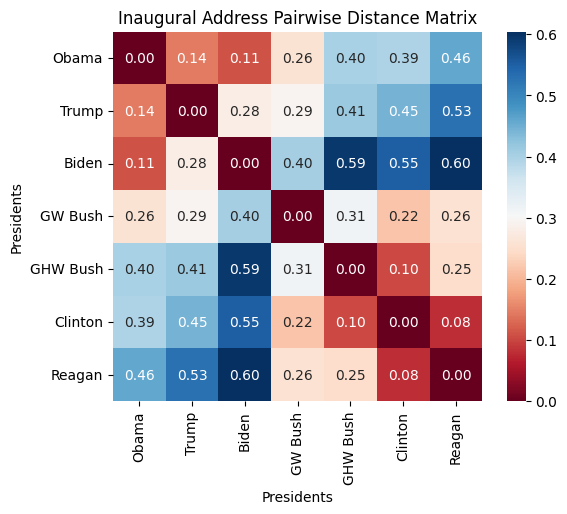

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(pairwise_distances_df, cmap='RdBu', annot=True, fmt=".2f", square=True)

# Add labels and title
plt.xlabel('Presidents')
plt.ylabel('Presidents')
plt.title('Inaugural Address Pairwise Distance Matrix')

# Show plot
plt.show()

Obama most similar to Biden. Trump most similar to Obama. Biden most simlar to Obama. GW bush most similar to Clinton. GHW Bush most similar to Clinton. Clinton most similar to Reagan. Reagan most similar to Clinton. Inaugural addresses may be more impacted by time period than partisanship.


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_farewell_addresses():
    url = "https://www.presidency.ucsb.edu/documents/presidential-documents-archive-guidebook/farewell-addresses"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        table = soup.find("table", class_="table")
        if table:
            addresses_data = []
            rows = table.find_all("tr")[1:]  # Exclude header row
            for row in rows:
                cells = row.find_all("td")
                if len(cells) >= 5:  # Ensure that there are at least 5 cells
                    president = cells[0].get_text(strip=True)
                    date = cells[1].a.get_text(strip=True)
                    address_url = cells[1].a["href"]
                    time = cells[2].get_text(strip=True)
                    location = cells[3].get_text(strip=True)
                    word_count = cells[4].get_text(strip=True)
                    address_content = scrape_address_content(address_url)
                    addresses_data.append({
                        "President": president,
                        "Date": date,
                        "Time": time,
                        "Location": location,
                        "Word Count": word_count,
                        "Farewell Address": address_content
                    })
            return addresses_data
        else:
            print("Table not found.")
    else:
        print("Failed to fetch page:", response.status_code)

def scrape_address_content(address_url):
    response = requests.get(address_url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        content_div = soup.find("div", class_="field-docs-content")
        if content_div:
            return content_div.get_text(strip=True)
        else:
            print("Address content not found.")
    else:
        print("Failed to fetch address page:", response.status_code)
    return ""

farewell_addresses_data = scrape_farewell_addresses()
df_farewell_addresses = pd.DataFrame(farewell_addresses_data)
df_farewell_addresses


,President,Date,Time,Location,Word Count,Farewell Address
0,George Washington,"September 19, 1796",n/a,(written),6073,Friends and Fellow Citizens:The period for a n...
1,Andrew Jackson,"March 4, 1837",n/a,(written),8247,FELLOW-CITIZENS: Being about to retire finally...
2,Harry S. Truman,"January 15, 1953",10:30 pm,Oval Office,3748,My fellow Americans:I am happy to have this op...
3,Dwight D. Eisenhower,"January 17, 1961",8:30 pm,Oval Office,1843,"My fellow Americans:Three days from now, after..."
4,Lyndon B. Johnson *(1),"January 14, 1969",9:05 pm,House Chamber,4146,"Mr. Speaker, Mr. President, Members of the Con..."
5,Richard Nixon *(2),"August 8, 1974",9:01 pm,Oval Office,1796,Key Terms: Nixon resignation speech; Nixon's r...
6,Gerald R. Ford *(3),"January 12, 1977",9:10 pm,House Chamber,4724,"Mr. Speaker, Mr. Vice President, Members of th..."
7,Jimmy Carter,"January 14, 1981",9:00 pm,Oval Office,2167,Good evening.In a few days I will lay down my ...
8,Ronald Reagan,"January 11, 1989",9:02 pm,Oval Office,3305,My fellow Americans:This is the 34th time I'll...
9,George Bush,"January 5, 1993",1:22 pm,West Point,3298,Thank you all very much. Good luck. Please be ...


<ipython-input-217-75ba3257b21b>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



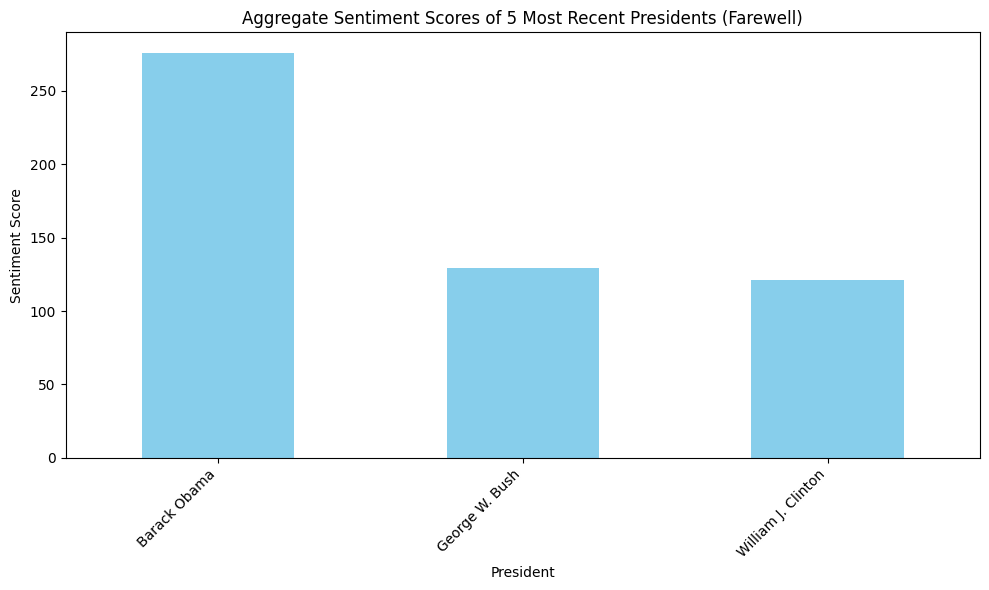

<ipython-input-217-75ba3257b21b>:55: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-217-75ba3257b21b>:55: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



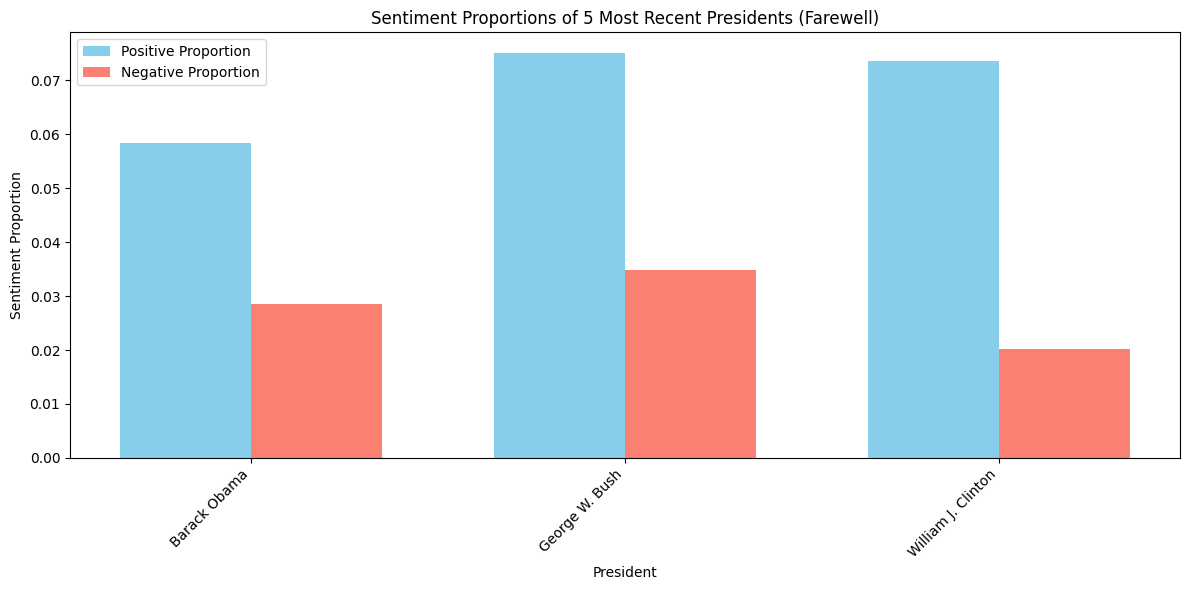

In [ ]:
from afinn import Afinn
import matplotlib.pyplot as plt
import pandas as pd

# Load the data containing state of the union addresses
# Assuming you have loaded the DataFrame df_speeches

# Filter the DataFrame to include only the 5 most recent presidents
recent_presidents = ['Joseph R. Biden', 'Donald J. Trump', 'Barack Obama', 'George W. Bush', 'William J. Clinton']
df_recent = df_farewell_addresses[df_farewell_addresses['President'].isin(recent_presidents)]

# Load the AFINN lexicon
afinn = Afinn()

# Function to calculate sentiment score for a given speech
def calculate_sentiment_score(speech):
    tokens = speech.lower().split()  # Tokenize speech into words
    sentiment_score = afinn.score(speech)  # Use AFINN for sentiment scoring
    return sentiment_score

# Calculate sentiment scores for each speech
df_recent['Sentiment Score'] = df_recent['Farewell Address'].apply(calculate_sentiment_score)

# Aggregate sentiment scores for each president
aggregate_sentiment_scores = df_recent.groupby('President')['Sentiment Score'].sum()

# Sort the presidents by their aggregated sentiment scores in descending order
aggregate_sentiment_scores_sorted = aggregate_sentiment_scores.sort_values(ascending=False)

# Visualize the aggregated sentiment scores
aggregate_sentiment_scores_sorted.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('President')
plt.ylabel('Sentiment Score')
plt.title('Aggregate Sentiment Scores of 5 Most Recent Presidents (Farewell)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Function to calculate sentiment proportions for positive and negative words for a given speech
def calculate_sentiment_proportions(speech):
    tokens = speech.lower().split()  # Tokenize speech into words
    positive_words = [token for token in tokens if afinn.score(token) > 0]  # Filter positive words
    negative_words = [token for token in tokens if afinn.score(token) < 0]  # Filter negative words
    positive_word_count = len(positive_words)
    negative_word_count = len(negative_words)
    total_word_count = len(tokens)
    if total_word_count == 0:  # Avoid division by zero
        return 0, 0
    positive_proportion = positive_word_count / total_word_count
    negative_proportion = negative_word_count / total_word_count
    return positive_proportion, negative_proportion

# Calculate sentiment proportions for each speech
df_recent['Positive Proportion'], df_recent['Negative Proportion'] = zip(*df_recent['Farewell Address'].apply(calculate_sentiment_proportions))

# Group the DataFrame by 'President' and aggregate the sentiment proportions
grouped_df = df_recent.groupby('President').agg({
    'Positive Proportion': 'mean',
    'Negative Proportion': 'mean'
})

# Set the positions for the bars
positions = list(range(len(grouped_df)))

# Define the width of each bar
bar_width = 0.35

# Visualize the sentiment proportions with side-by-side bars
plt.figure(figsize=(12, 6))
plt.bar(positions, grouped_df['Positive Proportion'], width=bar_width, color='skyblue', label='Positive Proportion')
plt.bar([p + bar_width for p in positions], grouped_df['Negative Proportion'], width=bar_width, color='salmon', label='Negative Proportion')
plt.xlabel('President')
plt.ylabel('Sentiment Proportion')
plt.title('Sentiment Proportions of 5 Most Recent Presidents (Farewell)')
plt.xticks([p + bar_width/2 for p in positions], grouped_df.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Create a DataFrame to display sentiment proportions
sentiment_proportions_df = grouped_df[['Positive Proportion', 'Negative Proportion']].reset_index()
sentiment_proportions_df.columns.name = None  # Remove column name for better display

print(sentiment_proportions_df)


            President  Positive Proportion  Negative Proportion
0        Barack Obama             0.058376             0.028553
1      George W. Bush             0.075163             0.034858
2  William J. Clinton             0.073529             0.020221


In [ ]:
df_farewell_addresses_names = df_farewell_addresses.iloc[:, :2]
df_farewell_addresses_names

,President,Date
0,George Washington,"September 19, 1796"
1,Andrew Jackson,"March 4, 1837"
2,Harry S. Truman,"January 15, 1953"
3,Dwight D. Eisenhower,"January 17, 1961"
4,Lyndon B. Johnson *(1),"January 14, 1969"
5,Richard Nixon *(2),"August 8, 1974"
6,Gerald R. Ford *(3),"January 12, 1977"
7,Jimmy Carter,"January 14, 1981"
8,Ronald Reagan,"January 11, 1989"
9,George Bush,"January 5, 1993"


In [ ]:
df_farewell_addresses["Farewell Address"][0]

"Friends and Fellow Citizens:The period for a new election of a citizen to administer the Executive Government of the United States being not far distant, and the time actually arrived when your thoughts must be employed in designating the person who is to be clothed with that important trust, it appears to me proper, especially as it may conduce to a more distinct expression of the public voice, that I should now apprise you of the resolution I have formed to decline being considered among the number of those out of whom a choice is to be made.I beg you at the same time to do me the justice to be assured that this resolution has not been taken without a strict regard to all the considerations appertaining to the relation which binds a dutiful citizen to his country; and that in withdrawing the tender of service, which silence in my situation might imply, I am influenced by no diminution of zeal for your future interest, no deficiency of grateful respect for your past kindness, but am 

In [ ]:
farewell_addresses_list = df_farewell_addresses["Farewell Address"].apply(str).tolist()
farewell_addresses_list

["Friends and Fellow Citizens:The period for a new election of a citizen to administer the Executive Government of the United States being not far distant, and the time actually arrived when your thoughts must be employed in designating the person who is to be clothed with that important trust, it appears to me proper, especially as it may conduce to a more distinct expression of the public voice, that I should now apprise you of the resolution I have formed to decline being considered among the number of those out of whom a choice is to be made.I beg you at the same time to do me the justice to be assured that this resolution has not been taken without a strict regard to all the considerations appertaining to the relation which binds a dutiful citizen to his country; and that in withdrawing the tender of service, which silence in my situation might imply, I am influenced by no diminution of zeal for your future interest, no deficiency of grateful respect for your past kindness, but am

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vec = CountVectorizer(max_features=50)
vec.fit(farewell_addresses_list)
tf_matrix = vec.transform(farewell_addresses_list)
tf_matrix = tf_matrix.todense()


In [ ]:
feature_names = vec.get_feature_names_out()
fare_tf_df = pd.DataFrame(tf_matrix, index=range(0, tf_matrix.shape[0]), columns=feature_names)
fare_tf_df

,all,america,an,and,are,as,at,be,been,but,...,was,we,which,who,will,with,world,years,you,your
0,21,0,29,208,24,45,16,75,14,23,...,5,10,77,11,34,62,2,2,29,46
1,29,0,19,391,56,40,29,86,29,40,...,16,27,63,26,60,58,5,3,44,36
2,26,2,7,127,20,33,13,31,17,14,...,26,59,7,3,28,20,29,11,20,6
3,14,5,2,79,5,15,2,18,8,8,...,0,26,4,6,11,16,8,4,9,1
4,25,11,10,107,26,27,14,27,27,19,...,5,67,5,5,27,22,14,25,19,4
5,16,10,0,52,5,22,13,15,9,17,...,5,19,7,13,16,17,8,6,6,4
6,20,11,11,181,27,41,13,23,13,21,...,24,81,16,5,26,26,15,17,13,6
7,17,3,7,82,18,18,5,12,6,16,...,3,38,9,5,13,11,17,4,6,0
8,20,15,15,151,16,17,14,12,15,31,...,40,64,6,13,12,13,7,15,32,7
9,12,3,6,116,16,20,22,42,8,19,...,11,33,4,8,11,30,16,5,31,7


In [ ]:
fare_merged_df = pd.merge(df_farewell_addresses_names, fare_tf_df, left_index=True, right_index=True, how='inner')
fare_merged_df

,President,Date,all,america,an,and,are,as,at,be,...,was,we,which,who,will,with,world,years,you,your
0,George Washington,"September 19, 1796",21,0,29,208,24,45,16,75,...,5,10,77,11,34,62,2,2,29,46
1,Andrew Jackson,"March 4, 1837",29,0,19,391,56,40,29,86,...,16,27,63,26,60,58,5,3,44,36
2,Harry S. Truman,"January 15, 1953",26,2,7,127,20,33,13,31,...,26,59,7,3,28,20,29,11,20,6
3,Dwight D. Eisenhower,"January 17, 1961",14,5,2,79,5,15,2,18,...,0,26,4,6,11,16,8,4,9,1
4,Lyndon B. Johnson *(1),"January 14, 1969",25,11,10,107,26,27,14,27,...,5,67,5,5,27,22,14,25,19,4
5,Richard Nixon *(2),"August 8, 1974",16,10,0,52,5,22,13,15,...,5,19,7,13,16,17,8,6,6,4
6,Gerald R. Ford *(3),"January 12, 1977",20,11,11,181,27,41,13,23,...,24,81,16,5,26,26,15,17,13,6
7,Jimmy Carter,"January 14, 1981",17,3,7,82,18,18,5,12,...,3,38,9,5,13,11,17,4,6,0
8,Ronald Reagan,"January 11, 1989",20,15,15,151,16,17,14,12,...,40,64,6,13,12,13,7,15,32,7
9,George Bush,"January 5, 1993",12,3,6,116,16,20,22,42,...,11,33,4,8,11,30,16,5,31,7


In [ ]:
fare_merged_df = fare_merged_df.drop(columns="Date")
fare_merged_df

,President,all,america,an,and,are,as,at,be,been,...,was,we,which,who,will,with,world,years,you,your
0,George Washington,21,0,29,208,24,45,16,75,14,...,5,10,77,11,34,62,2,2,29,46
1,Andrew Jackson,29,0,19,391,56,40,29,86,29,...,16,27,63,26,60,58,5,3,44,36
2,Harry S. Truman,26,2,7,127,20,33,13,31,17,...,26,59,7,3,28,20,29,11,20,6
3,Dwight D. Eisenhower,14,5,2,79,5,15,2,18,8,...,0,26,4,6,11,16,8,4,9,1
4,Lyndon B. Johnson *(1),25,11,10,107,26,27,14,27,27,...,5,67,5,5,27,22,14,25,19,4
5,Richard Nixon *(2),16,10,0,52,5,22,13,15,9,...,5,19,7,13,16,17,8,6,6,4
6,Gerald R. Ford *(3),20,11,11,181,27,41,13,23,13,...,24,81,16,5,26,26,15,17,13,6
7,Jimmy Carter,17,3,7,82,18,18,5,12,6,...,3,38,9,5,13,11,17,4,6,0
8,Ronald Reagan,20,15,15,151,16,17,14,12,15,...,40,64,6,13,12,13,7,15,32,7
9,George Bush,12,3,6,116,16,20,22,42,8,...,11,33,4,8,11,30,16,5,31,7


In [ ]:
fare_merged_df.set_index('President', inplace=True)


In [ ]:
fare_merged_df

,all,america,an,and,are,as,at,be,been,but,...,was,we,which,who,will,with,world,years,you,your
President,,,,,,,,,,,,,,,,,,,,,
George Washington,21,0,29,208,24,45,16,75,14,23,...,5,10,77,11,34,62,2,2,29,46
Andrew Jackson,29,0,19,391,56,40,29,86,29,40,...,16,27,63,26,60,58,5,3,44,36
Harry S. Truman,26,2,7,127,20,33,13,31,17,14,...,26,59,7,3,28,20,29,11,20,6
Dwight D. Eisenhower,14,5,2,79,5,15,2,18,8,8,...,0,26,4,6,11,16,8,4,9,1
Lyndon B. Johnson *(1),25,11,10,107,26,27,14,27,27,19,...,5,67,5,5,27,22,14,25,19,4
Richard Nixon *(2),16,10,0,52,5,22,13,15,9,17,...,5,19,7,13,16,17,8,6,6,4
Gerald R. Ford *(3),20,11,11,181,27,41,13,23,13,21,...,24,81,16,5,26,26,15,17,13,6
Jimmy Carter,17,3,7,82,18,18,5,12,6,16,...,3,38,9,5,13,11,17,4,6,0
Ronald Reagan,20,15,15,151,16,17,14,12,15,31,...,40,64,6,13,12,13,7,15,32,7


In [ ]:
fare_proportion_df = fare_merged_df.divide(fare_merged_df.sum(axis="columns"), axis="rows")
fare_proportion_df

,all,america,an,and,are,as,at,be,been,but,...,was,we,which,who,will,with,world,years,you,your
President,,,,,,,,,,,,,,,,,,,,,
George Washington,0.007712,0.000000,0.010650,0.076386,0.008814,0.016526,0.005876,0.027543,0.005141,0.008447,...,0.001836,0.003672,0.028278,0.004040,0.012486,0.022769,0.000734,0.000734,0.010650,0.016893
Andrew Jackson,0.007562,0.000000,0.004954,0.101956,0.014602,0.010430,0.007562,0.022425,0.007562,0.010430,...,0.004172,0.007040,0.016428,0.006780,0.015645,0.015124,0.001304,0.000782,0.011473,0.009387
Harry S. Truman,0.016129,0.001241,0.004342,0.078784,0.012407,0.020471,0.008065,0.019231,0.010546,0.008685,...,0.016129,0.036600,0.004342,0.001861,0.017370,0.012407,0.017990,0.006824,0.012407,0.003722
Dwight D. Eisenhower,0.017880,0.006386,0.002554,0.100894,0.006386,0.019157,0.002554,0.022989,0.010217,0.010217,...,0.000000,0.033206,0.005109,0.007663,0.014049,0.020434,0.010217,0.005109,0.011494,0.001277
Lyndon B. Johnson *(1),0.013881,0.006108,0.005552,0.059411,0.014436,0.014992,0.007773,0.014992,0.014992,0.010550,...,0.002776,0.037202,0.002776,0.002776,0.014992,0.012215,0.007773,0.013881,0.010550,0.002221
Richard Nixon *(2),0.018412,0.011507,0.000000,0.059839,0.005754,0.025316,0.014960,0.017261,0.010357,0.019563,...,0.005754,0.021864,0.008055,0.014960,0.018412,0.019563,0.009206,0.006904,0.006904,0.004603
Gerald R. Ford *(3),0.010142,0.005578,0.005578,0.091785,0.013692,0.020791,0.006592,0.011663,0.006592,0.010649,...,0.012170,0.041075,0.008114,0.002535,0.013185,0.013185,0.007606,0.008621,0.006592,0.003043
Jimmy Carter,0.017382,0.003067,0.007157,0.083845,0.018405,0.018405,0.005112,0.012270,0.006135,0.016360,...,0.003067,0.038855,0.009202,0.005112,0.013292,0.011247,0.017382,0.004090,0.006135,0.000000
Ronald Reagan,0.014255,0.010691,0.010691,0.107627,0.011404,0.012117,0.009979,0.008553,0.010691,0.022096,...,0.028510,0.045617,0.004277,0.009266,0.008553,0.009266,0.004989,0.010691,0.022808,0.004989


In [ ]:
# lets look at Obama, Trump, Biden, GW Bush, Clinton. Maybe instead, remove pronouns and prepositions.
# use natural language processing (NLP) libraries like NLTK (Natural Language Toolkit) or SpaCy,
# which provide predefined lists of stopwords (commonly occurring words like pronouns, prepositions, conjunctions, etc.) that can be filtered out.

obama_series = fare_proportion_df.loc["Barack Obama"].sort_values(ascending=False)
trump_series = fare_proportion_df.loc["Donald Trump"].sort_values(ascending=False)
gw_bush_series = fare_proportion_df.loc["George W. Bush"].sort_values(ascending=False)
clinton_series = fare_proportion_df.loc["William J. Clinton"].sort_values(ascending=False)



In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords



# Download NLTK stopwords and wordnet if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')


# Example Series of words
words_series = obama_series.index

# Get NLTK English stopwords list
stop_words = set(stopwords.words('english'))

# Extend stop_words list to include basic verbs and question words
additional_stop_words = {'am', 'is', 'are', 'was', 'were', 'be', 'being', 'been', 'do', 'does', 'did',
                         'have', 'has', 'had', 'can', 'could', 'will', 'would',
                         'may', 'might', 'how', 'what', 'which',
                         'who', 'whom', 'whose', 'where', 'when', 'why'}

stop_words.update(additional_stop_words)

# Drop stopwords from the Series
filtered_obama_words_series = words_series[~words_series.str.lower().isin(stop_words)]
filtered_obama_words_series

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Index(['years', 'people', 'america', 'every', 'one', 'president', 'world',
       'government', 'must'],
      dtype='object')

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords



# Download NLTK stopwords and wordnet if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')


# Example Series of words
words_series = trump_series.index

# Get NLTK English stopwords list
stop_words = set(stopwords.words('english'))

# Extend stop_words list to include basic verbs and question words
additional_stop_words = {'am', 'is', 'are', 'was', 'were', 'be', 'being', 'been', 'do', 'does', 'did',
                         'have', 'has', 'had', 'can', 'could', 'will', 'would',
                         'may', 'might', 'how', 'what', 'which',
                         'who', 'whom', 'whose', 'where', 'when', 'why'}

stop_words.update(additional_stop_words)

# Drop stopwords from the Series
filtered_trump_words_series = words_series[~words_series.str.lower().isin(stop_words)]
filtered_trump_words_series

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Index(['america', 'world', 'people', 'years', 'one', 'every', 'must',
       'president', 'government'],
      dtype='object')

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords



# Download NLTK stopwords and wordnet if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')


# Example Series of words
words_series = gw_bush_series.index

# Get NLTK English stopwords list
stop_words = set(stopwords.words('english'))

# Extend stop_words list to include basic verbs and question words
additional_stop_words = {'am', 'is', 'are', 'was', 'were', 'be', 'being', 'been', 'do', 'does', 'did',
                         'have', 'has', 'had', 'can', 'could', 'will', 'would',
                         'may', 'might', 'how', 'what', 'which',
                         'who', 'whom', 'whose', 'where', 'when', 'why'}

stop_words.update(additional_stop_words)

# Drop stopwords from the Series
filtered_gw_bush_words_series = words_series[~words_series.str.lower().isin(stop_words)]
filtered_gw_bush_words_series

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Index(['america', 'must', 'people', 'years', 'world', 'president', 'every',
       'one', 'government'],
      dtype='object')

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords



# Download NLTK stopwords and wordnet if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')


# Example Series of words
words_series = clinton_series.index

# Get NLTK English stopwords list
stop_words = set(stopwords.words('english'))

# Extend stop_words list to include basic verbs and question words
additional_stop_words = {'am', 'is', 'are', 'was', 'were', 'be', 'being', 'been', 'do', 'does', 'did',
                         'have', 'has', 'had', 'can', 'could', 'will', 'would',
                         'may', 'might', 'how', 'what', 'which',
                         'who', 'whom', 'whose', 'where', 'when', 'why'}

stop_words.update(additional_stop_words)

# Drop stopwords from the Series
filtered_clinton_words_series = words_series[~words_series.str.lower().isin(stop_words)]
filtered_clinton_words_series

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Index(['america', 'world', 'people', 'must', 'every', 'president', 'years',
       'one', 'government'],
      dtype='object')

In [ ]:
filtered_obama_frequencies = obama_series[obama_series.index.isin(filtered_obama_words_series)]
filtered_obama_frequencies

years         0.010179
people        0.009210
america       0.008725
every         0.007271
one           0.005332
president     0.005332
world         0.003878
government    0.001939
must          0.001454
Name: Barack Obama, dtype: float64

In [ ]:
filtered_trump_frequencies = trump_series[trump_series.index.isin(filtered_trump_words_series)]
filtered_trump_frequencies

america       0.020305
world         0.012690
people        0.010998
years         0.009306
one           0.007614
every         0.006768
must          0.005922
president     0.005076
government    0.003384
Name: Donald Trump, dtype: float64

In [ ]:
filtered_gw_bush_frequencies = gw_bush_series[gw_bush_series.index.isin(filtered_gw_bush_words_series)]
filtered_gw_bush_frequencies

america       0.023468
must          0.011734
people        0.011734
years         0.011734
world         0.009126
president     0.007823
every         0.005215
one           0.001304
government    0.000000
Name: George W. Bush, dtype: float64

In [ ]:
filtered_clinton_frequencies = clinton_series[clinton_series.index.isin(filtered_clinton_words_series)]
filtered_clinton_frequencies

america       0.024096
world         0.020080
people        0.016064
must          0.016064
every         0.014056
president     0.012048
years         0.008032
one           0.002008
government    0.002008
Name: William J. Clinton, dtype: float64

In [ ]:
new_df = pd.concat([filtered_obama_frequencies, filtered_trump_frequencies, filtered_gw_bush_frequencies, filtered_clinton_frequencies], axis=1, keys=['Obama', 'Trump', 'GW Bush', "Clinton"])
new_df

,Obama,Trump,GW Bush,Clinton
years,0.010179,0.009306,0.011734,0.008032
people,0.009210,0.010998,0.011734,0.016064
america,0.008725,0.020305,0.023468,0.024096
every,0.007271,0.006768,0.005215,0.014056
one,0.005332,0.007614,0.001304,0.002008
president,0.005332,0.005076,0.007823,0.012048
world,0.003878,0.012690,0.009126,0.020080
government,0.001939,0.003384,0.000000,0.002008
must,0.001454,0.005922,0.011734,0.016064


In [ ]:
import plotly.express as px

fig = px.bar(new_df, barmode="group", title="Most Common Meaningful Words in Farewell Speeches And Usage By Presidents (In Proportion)")
# Update layout
fig.update_layout(
    xaxis_title="Most Common Meaningful Words",
    yaxis_title="Usage By Presidents (Percentage of Corpus)"

)

# Update legend label
fig.update_layout(
    legend_title="Presidents"
)


# Show plot
fig.show()

In [ ]:
new_df_transpose = new_df.transpose()

new_df_transpose.reset_index(inplace=True)
new_df_transpose.rename(columns={'index': 'President'}, inplace=True)
new_df_transpose

,President,years,people,america,every,one,president,world,government,must
0,Obama,0.010179,0.009210,0.008725,0.007271,0.005332,0.005332,0.003878,0.001939,0.001454
1,Trump,0.009306,0.010998,0.020305,0.006768,0.007614,0.005076,0.012690,0.003384,0.005922
2,GW Bush,0.011734,0.011734,0.023468,0.005215,0.001304,0.007823,0.009126,0.000000,0.011734
3,Clinton,0.008032,0.016064,0.024096,0.014056,0.002008,0.012048,0.020080,0.002008,0.016064


In [ ]:
new_df_transpose = new_df_transpose.drop(columns=["President"])
new_df_transpose

,years,people,america,every,one,president,world,government,must
0,0.010179,0.009210,0.008725,0.007271,0.005332,0.005332,0.003878,0.001939,0.001454
1,0.009306,0.010998,0.020305,0.006768,0.007614,0.005076,0.012690,0.003384,0.005922
2,0.011734,0.011734,0.023468,0.005215,0.001304,0.007823,0.009126,0.000000,0.011734
3,0.008032,0.016064,0.024096,0.014056,0.002008,0.012048,0.020080,0.002008,0.016064


In [ ]:
from sklearn.metrics import pairwise_distances
pairwise_distances_matrix = pairwise_distances(new_df_transpose, new_df_transpose, metric="cosine")
pairwise_distances_matrix

array([[0.        , 0.09843303, 0.14779834, 0.16987383],
       [0.09843303, 0.        , 0.05578108, 0.06263638],
       [0.14779834, 0.05578108, 0.        , 0.05803524],
       [0.16987383, 0.06263638, 0.05803524, 0.        ]])

In [ ]:
pairwise_distances_df = pd.DataFrame(pairwise_distances_matrix, index=new_df_transpose.index, columns=new_df_transpose.index)
pairwise_distances_df

,0,1,2,3
0,0.000000,0.098433,0.147798,0.169874
1,0.098433,0.000000,0.055781,0.062636
2,0.147798,0.055781,0.000000,0.058035
3,0.169874,0.062636,0.058035,0.000000


In [ ]:
pairwise_distances_df = pairwise_distances_df.rename(columns={0: 'Obama', 1: 'Trump', 2: 'GW Bush', 3: 'Clinton'})
pairwise_distances_df = pairwise_distances_df.rename(index={0: 'Obama', 1: 'Trump', 2: 'GW Bush', 3: 'Clinton'})
pairwise_distances_df

,Obama,Trump,GW Bush,Clinton
Obama,0.000000,0.098433,0.147798,0.169874
Trump,0.098433,0.000000,0.055781,0.062636
GW Bush,0.147798,0.055781,0.000000,0.058035
Clinton,0.169874,0.062636,0.058035,0.000000


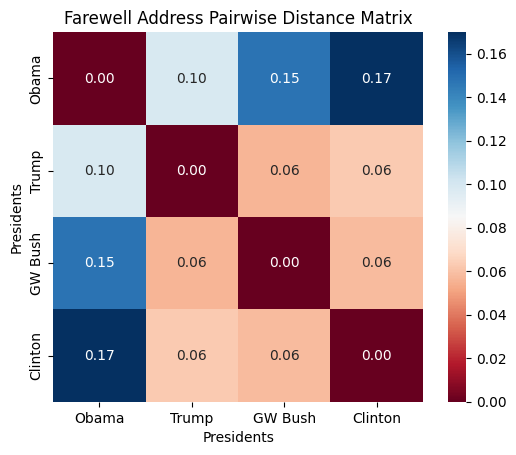

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(pairwise_distances_df, cmap='RdBu', annot=True, fmt=".2f", square=True)

# Add labels and title
plt.xlabel('Presidents')
plt.ylabel('Presidents')
plt.title('Farewell Address Pairwise Distance Matrix')

# Show plot
plt.show()

Obama most similar to Trump. Trump most similar to GW Bush. GW Bush most similar to Trump. Clinton most similar to GW Bush.